# <div align="center"> Ames Housing Prediction Model </div>

#### In this project, we will be taking data from the Ames Housing Dataset and iterating and refining a regression model to predict home prices for the Housing & Urban Development Agency in Ames, Iowa.

They would like to know how best to help homeowners in their city raise their property values, and which neighborhoods may need the most resources to raise the overall neighborhood values in the city.

#### We will be answering the following questions:
- Which regression model is best for predicting the prices?
- Which features/how many features are needed to make a model that works well?
- What percent of our prediction prices are explained by our features?
- What do the coefficients of the model tell us?
- What are the prediction prices?
- Which neighborhoods have the highest affect on our prediction prices (both negative and positive)?
- How our coefficients can help guide homeowners into maximizing their dollar to raise their property value.

#### We will be using the following models to try to predict our target of home prices and choose the best one based on our metrics of $r^2$ score and testing root mean squared errors (RMSE):

- Linear Regression
- Scaled Linear Regression (OLS - Ordinary Least Squares)
- Ridge Regression
- Lasso Regression
- KNeighborsRegressor using Pipeline with StandardScaler
- Ridge Regression using Pipeline with StandardScaler

## <div align="center"> Exploring and Cleaning Datasets

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from scipy import stats
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.feature_selection import mutual_info_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline

from IPython.display import Markdown as md

In [2]:
# reading in datasets

train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')

In [3]:
# checking number of rows and columns

print (train.shape)
print (test.shape)

(2051, 81)
(878, 80)


In [4]:
# setting index to 'Id'

train.set_index('Id', inplace=True)
test.set_index('Id', inplace=True)

In [5]:
# exploring training dataset

train.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [6]:
# checking columns 

train.columns

Index(['PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish'

In [7]:
# Checking data stats for numeric columns
train.iloc[:,:28].describe()

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area
count,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000
mean,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909
std,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129
min,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000
25%,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000
50%,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000
75%,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000
max,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000


In [8]:
# Checking data stats for numeric columns
train.iloc[:,28:54].describe()

,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr
count,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906
std,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790
min,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000
50%,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000
75%,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000
max,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000


In [9]:
# Checking data stats for numeric columns
train.iloc[:,54:].describe()

,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,6.435885,0.590931,1978.707796,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,1.560225,0.638516,25.441094,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [10]:
# checking 'SalePrice' column for any errors
train['SalePrice'].sort_values(ascending=False)

Id
45      611657
1638    591587
2451    584500
434     582933
2333    556581
         ...  
2881     35311
2844     35000
727      34900
1554     13100
182      12789
Name: SalePrice, Length: 2051, dtype: int64

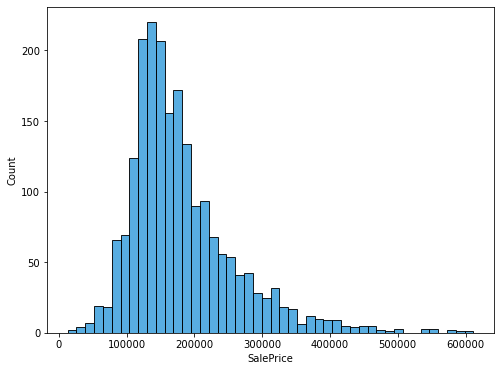

In [11]:
plt.figure(figsize=(8,6))
sns.histplot(x=train['SalePrice'], color='#2092D8');

In [12]:
# Looking into higher values to see if there's outliers
# Don't seem to be any error values, just some poor condition old homes sold dirt cheap (verified ID 182 with Zillow)
train[(train['SalePrice'] < 40000) | (train['SalePrice'] > 550000)][['PID','Overall Qual', 'Overall Cond', 'Year Built', 'SalePrice', 'Functional']]

,PID,Overall Qual,Overall Cond,Year Built,SalePrice,Functional
Id,,,,,,
2333,527212030,9,5,2005,556581,Typ
1554,910251050,1,5,1952,13100,Sal
457,528176030,10,5,2004,552000,Typ
424,528106020,10,5,2008,555000,Typ
2844,909101330,2,3,1922,35000,Typ
727,902477120,4,5,1920,34900,Typ
1902,534450090,1,3,1946,39300,Typ
2881,911175430,2,3,1949,35311,Typ
710,902205030,3,6,1910,37900,Typ


In [13]:
# In order to make our 'SalePrice' column normally distributed without much tail, we will drop the few outliers
train = train[(train['SalePrice'] > 29999) & (train['SalePrice'] < 500000)]

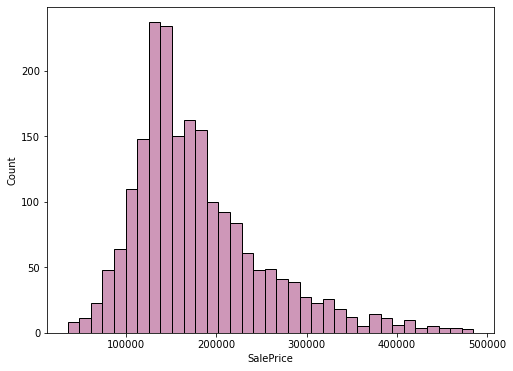

In [14]:
# Rechecking histogram for normal distribution
plt.figure(figsize=(8,6))
sns.histplot(x=train['SalePrice'], color='#BE75A0');

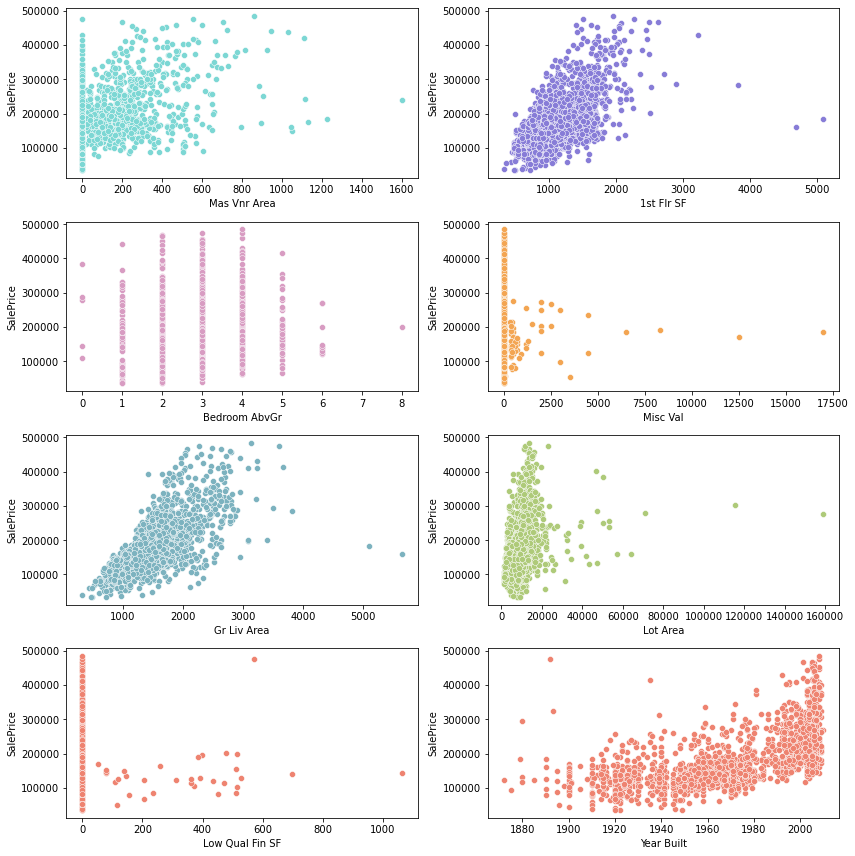

In [15]:
# Scatterplotting to see relationship with 'SalePrice' and any outliers can be checked into

fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(4, 2, 1)
ax1 = sns.scatterplot(data=train, x='Mas Vnr Area', y='SalePrice', color='#7CD7D4') #light blue
ax2 = fig.add_subplot(4, 2, 2)
ax2 = sns.scatterplot(data=train, x='1st Flr SF', y='SalePrice', color='#877CD7') #lilac
ax3 = fig.add_subplot(4, 2, 3)
ax3 = sns.scatterplot(data=train, x='Bedroom AbvGr', y='SalePrice', color='#D89CC2'); #dusty rose
ax4 = fig.add_subplot(4, 2, 4)
ax4 = sns.scatterplot(data=train, x='Misc Val', y='SalePrice', color='#F3A552') #light orange
ax5 = fig.add_subplot(4, 2, 5)
ax5 = sns.scatterplot(data=train, x='Gr Liv Area', y='SalePrice', color='#7CB2BF') #dusty blue
ax6 = fig.add_subplot(4, 2, 6)
ax6 = sns.scatterplot(data=train, x='Lot Area', y='SalePrice', color='#AECA79') #light green
ax7 = fig.add_subplot(4, 2, 7)
ax7 = sns.scatterplot(data=train, x='Low Qual Fin SF', y='SalePrice', color='#EE8370') #salmon
ax8 = fig.add_subplot(4, 2, 8)
ax8 = sns.scatterplot(data=train, x='Year Built', y='SalePrice', color='#EE8370') #salmon

plt.tight_layout();

In [16]:
train[(train['Year Built'] < 1900) & (train['SalePrice'] > 400000)][['Overall Qual', 'Overall Cond', 'Lot Area', 'Gr Liv Area', 'Total Bsmt SF','Year Built', 'SalePrice', 'Functional']]

,Overall Qual,Overall Cond,Lot Area,Gr Liv Area,Total Bsmt SF,Year Built,SalePrice,Functional
Id,,,,,,,,
2667,10,9,22950,3608,1107.0,1892,475000,Typ


In [17]:
train.drop(index=2667, inplace=True)

In [189]:
train[train['Year Built'] > 2010][['Overall Qual', 'Overall Cond', 'Lot Area', 'Gr Liv Area', 'Total Bsmt SF','Year Built', 'SalePrice', 'Functional']]


,Overall Qual,Overall Cond,Lot Area,Gr Liv Area,Total Bsmt SF,Year Built,SalePrice,Functional
Id,,,,,,,,


In [18]:
# Looking into outliers
train[train['Gr Liv Area'] > 5000][['PID','Overall Qual', 'Overall Cond', 'Gr Liv Area', 'Total Bsmt SF','Year Built', 'SalePrice', 'Functional']]

,PID,Overall Qual,Overall Cond,Gr Liv Area,Total Bsmt SF,Year Built,SalePrice,Functional
Id,,,,,,,,
1499,908154235,10,5,5642,6110.0,2008,160000,Typ
2181,908154195,10,5,5095,5095.0,2008,183850,Typ


In [19]:
# dropping outlier rows
train = train[train['Gr Liv Area'] < 5000]
train.shape

(2033, 80)

In [20]:
# Looking into outliers
train[train['Lot Area'] > 80000][['PID','Overall Qual', 'Overall Cond', 'Gr Liv Area', 'Total Bsmt SF','Year Built', 'SalePrice', 'Functional']]

,PID,Overall Qual,Overall Cond,Gr Liv Area,Total Bsmt SF,Year Built,SalePrice,Functional
Id,,,,,,,,
2116,906426060,6,7,2144,1444.0,1958,277000,Typ
2072,905301050,7,5,1824,1643.0,1971,302000,Typ


In [21]:
# Dropping outlier rows
train = train[train['Lot Area'] < 80000]
train.shape

(2031, 80)

In [22]:
# Looking into outliers
train[train['Low Qual Fin SF'] > 550][['Low Qual Fin SF','Overall Qual', 'Overall Cond',
                                        'Year Built', 'Year Remod/Add', 'SalePrice']]
# Not dropping since the row seems fine other than this

,Low Qual Fin SF,Overall Qual,Overall Cond,Year Built,Year Remod/Add,SalePrice
Id,,,,,,
661,1064,4,5,1915,1950,142900
1362,697,6,6,1938,1958,141000


In [23]:
# Looking into outliers
train[train['Garage Yr Blt'] > 2010]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
2261,916384070,20,RL,68.0,8298,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,9,2007,New,267300


In [24]:
# Dropping outlier rows
train.drop(index=2261, inplace=True)

In [25]:
# Looking into outliers
train = train[train['Mas Vnr Area'] < 1200]

In [26]:
# Looking into outliers
train[(train['1st Flr SF'] > 3500) & (train['SalePrice'] < 500000)][['BsmtFin SF 1','Low Qual Fin SF','Overall Qual', 'Overall Cond',
                                        'Year Built', 'Year Remod/Add', 'SalePrice']]

,BsmtFin SF 1,Low Qual Fin SF,Overall Qual,Overall Cond,Year Built,Year Remod/Add,SalePrice
Id,,,,,,,
1498,0.0,0,5,7,1959,1996,284700


In [27]:
# Dropping outlier rows
train.drop(index=1498, inplace=True)

In [28]:
# Looking into outliers
train[train['Bedroom AbvGr'] > 6][['BsmtFin SF 1','Low Qual Fin SF','Overall Qual', 'Overall Cond',
                                        'Year Built', 'Year Remod/Add', 'SalePrice']]

,BsmtFin SF 1,Low Qual Fin SF,Overall Qual,Overall Cond,Year Built,Year Remod/Add,SalePrice
Id,,,,,,,
2195,256.0,515,6,7,1914,1995,200000


In [29]:
# Dropping outlier rows
train.drop(index=2195, inplace=True)

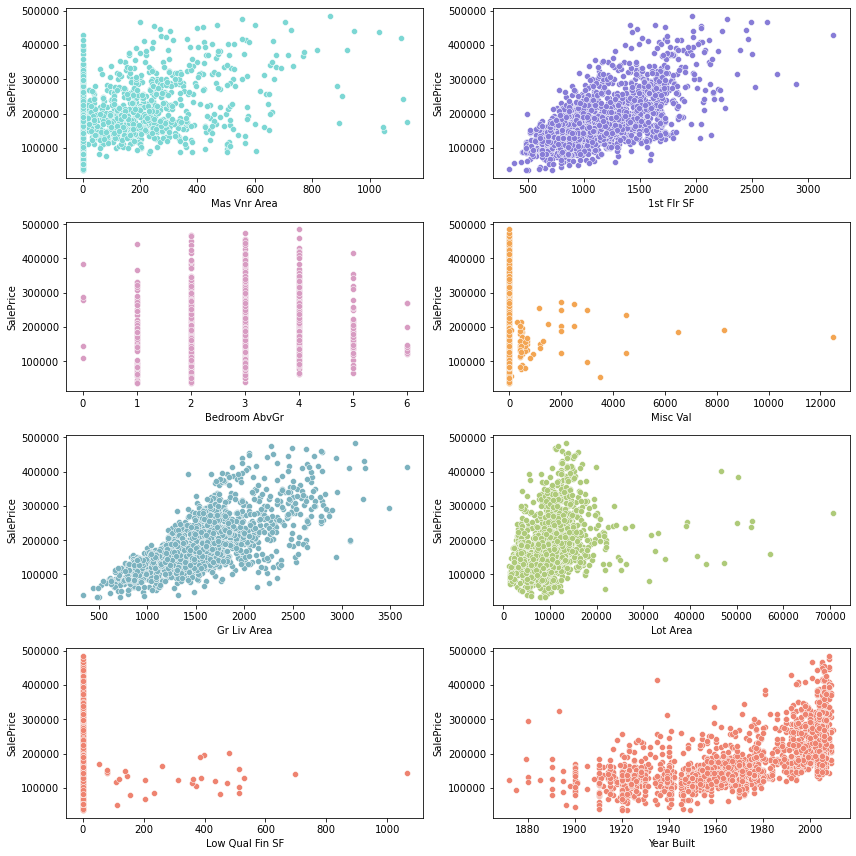

In [30]:
# Rechecking scatterplots from above after cleaning
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(4, 2, 1)
ax1 = sns.scatterplot(data=train, x='Mas Vnr Area', y='SalePrice', color='#7CD7D4') #light blue
ax2 = fig.add_subplot(4, 2, 2)
ax2 = sns.scatterplot(data=train, x='1st Flr SF', y='SalePrice', color='#877CD7') #lilac
ax3 = fig.add_subplot(4, 2, 3)
ax3 = sns.scatterplot(data=train, x='Bedroom AbvGr', y='SalePrice', color='#D89CC2'); #dusty rose
ax4 = fig.add_subplot(4, 2, 4)
ax4 = sns.scatterplot(data=train, x='Misc Val', y='SalePrice', color='#F3A552') #light orange
ax5 = fig.add_subplot(4, 2, 5)
ax5 = sns.scatterplot(data=train, x='Gr Liv Area', y='SalePrice', color='#7CB2BF') #dusty blue
ax6 = fig.add_subplot(4, 2, 6)
ax6 = sns.scatterplot(data=train, x='Lot Area', y='SalePrice', color='#AECA79') #light green
ax7 = fig.add_subplot(4, 2, 7)
ax7 = sns.scatterplot(data=train, x='Low Qual Fin SF', y='SalePrice', color='#EE8370') #salmon
ax8 = fig.add_subplot(4, 2, 8)
ax8 = sns.scatterplot(data=train, x='Year Built', y='SalePrice', color='#EE8370') #salmon
plt.tight_layout();

In [31]:
# making dummy columns from nominal data columns

train_full = pd.get_dummies(train, columns = ['Neighborhood', 'Mas Vnr Type', 'Exterior 1st', 'Exterior 2nd', 
                                      'Roof Matl', 'Roof Style', 'House Style', 'Bldg Type', 'Condition 1', 
                                      'Condition 2', 'MS SubClass', 'MS Zoning', 'Street', 'Foundation',
                                      'Land Contour', 'Lot Config', 'Heating', 'Central Air', 'Misc Feature'], drop_first=True)
test_full = pd.get_dummies(test, columns = ['Neighborhood', 'Mas Vnr Type', 'Exterior 1st', 'Exterior 2nd', 
                                    'Roof Matl', 'Roof Style', 'House Style', 'Bldg Type', 'Condition 1',
                                    'Condition 2', 'MS SubClass', 'MS Zoning', 'Street', 'Foundation',
                                    'Land Contour', 'Lot Config', 'Heating', 'Central Air', 'Misc Feature'], drop_first=True)

train_full.head(3)

,PID,Lot Frontage,Lot Area,Alley,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Year Built,...,Lot Config_FR3,Lot Config_Inside,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_Y,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC
Id,,,,,,,,,,,,,,,,,,,,,
109,533352170,NaN,13517,NaN,IR1,AllPub,Gtl,6,8,1976,...,0,0,0,0,0,0,1,0,0,0
544,531379050,43.0,11492,NaN,IR1,AllPub,Gtl,7,5,1996,...,0,0,0,0,0,0,1,0,0,0
153,535304180,68.0,7922,NaN,Reg,AllPub,Gtl,5,7,1953,...,0,1,0,0,0,0,1,0,0,0


In [32]:
# checking datasets have same number of columns

print(train_full.shape)
print(test_full.shape)

(2006, 196)
(878, 185)


In [33]:
# finding the columns in datasets not in common between training and testing datasets

set(train_full) - set(test_full)

{'Condition 2_Feedr',
 'Condition 2_PosN',
 'Condition 2_RRAe',
 'Condition 2_RRAn',
 'Condition 2_RRNn',
 'Exterior 1st_CBlock',
 'Exterior 1st_ImStucc',
 'Exterior 1st_Stone',
 'Exterior 2nd_Stone',
 'Heating_OthW',
 'Heating_Wall',
 'MS SubClass_150',
 'MS Zoning_C (all)',
 'Misc Feature_TenC',
 'Neighborhood_GrnHill',
 'Neighborhood_Landmrk',
 'Roof Matl_Membran',
 'SalePrice'}

In [34]:
# forcing the datasets to have the same number of columns

missing_cols = list(set(train_full) - set(test_full))

for col in missing_cols:
    test_full[col] = 0

set(train_full) - set(test_full)

set()

In [35]:
# checking for missing values

train_full.isna().sum().sort_values(ascending=False).head(30)

Pool QC             1998
Alley               1870
Fence               1607
Fireplace Qu         990
Lot Frontage         322
Garage Yr Blt        112
Garage Finish        112
Garage Qual          112
Garage Cond          112
Garage Type          111
Bsmt Exposure         56
BsmtFin Type 2        54
Bsmt Qual             53
Bsmt Cond             53
BsmtFin Type 1        53
BsmtFin SF 2           1
Garage Area            1
Total Bsmt SF          1
Bsmt Unf SF            1
Garage Cars            1
Bsmt Full Bath         1
BsmtFin SF 1           1
Bsmt Half Bath         1
Condition 2_PosN       0
Condition 2_RRAe       0
Condition 2_PosA       0
Condition 2_Norm       0
Bldg Type_Duplex       0
Condition 1_RRAn       0
Bldg Type_Twnhs        0
dtype: int64

In [36]:
# replacing nan with mean of column

train_full['Lot Frontage'].replace(np.nan, train_full['Lot Frontage'].mean(), inplace=True)
test_full['Lot Frontage'].replace(np.nan, test_full['Lot Frontage'].mean(), inplace=True)

In [37]:
# replacing nan with mean of column

train_full['Mas Vnr Area'].replace(np.nan, train_full['Mas Vnr Area'].mean(), inplace=True)
test_full['Mas Vnr Area'].replace(np.nan, test_full['Mas Vnr Area'].mean(), inplace=True)

In [38]:
# replacing nan with median of column

train_full['Garage Yr Blt'].replace(np.nan, train_full['Garage Yr Blt'].median(), inplace=True)
test_full['Garage Yr Blt'].replace(np.nan, test_full['Garage Yr Blt'].median(), inplace=True)

In [39]:
# checking value counts of 'Kitchen Qual' just to check there aren't errors

train_full['Kitchen Qual'].value_counts()

TA    1044
Gd     786
Ex     131
Fa      45
Name: Kitchen Qual, dtype: int64

In [40]:
# replacing ordinal values with a ranking scale

#        Ex	Excellent
#        Gd	Good
#        TA	Typical/Average
#        Fa	Fair
#        Po	Poor
#        NA	No Basement

train_full = train_full.replace('Ex', 5).replace('Gd', 4).replace('TA', 3).replace('Fa', 2).replace('Po', 1)
test_full = test_full.replace('Ex', 5).replace('Gd', 4).replace('TA', 3).replace('Fa', 2).replace('Po', 1)

#        GLQ	Good Living Quarters
#        ALQ	Average Living Quarters
#        BLQ	Below Average Living Quarters	
#        Rec	Average Rec Room
#        LwQ	Low Quality
#        Unf	Unfinshed
#        NA	No Basement

train_full = train_full.replace('GLQ', 6).replace('ALQ', 5).replace('BLQ', 4).replace('Rec', 3).replace('LwQ', 2).replace('Unf', 1).replace('NA', 0)
test_full = test_full.replace('GLQ', 6).replace('ALQ', 5).replace('BLQ', 4).replace('Rec', 3).replace('LwQ', 2).replace('Unf', 1).replace('NA', 0)

train_full['Kitchen Qual'].value_counts()

3    1044
4     786
5     131
2      45
Name: Kitchen Qual, dtype: int64

In [41]:
# replacing ordinal values with a ranking scale

# Paved Drive (Ordinal): Paved driveway

#        Y	Paved 
#        P	Partial Pavement
#        N	Dirt/Gravel
train_full['Paved Drive'] = train_full['Paved Drive'].replace('Y', 2).replace('P', 1).replace('N', 0)
test_full['Paved Drive'] = test_full['Paved Drive'].replace('Y', 2).replace('P', 1).replace('N', 0)

# Fence (Ordinal): Fence quality
		
#        GdPrv	Good Privacy
#        MnPrv	Minimum Privacy
#        GdWo	Good Wood
#        MnWw	Minimum Wood/Wire
#        NA	No Fence

train_full['Fence'] = train_full['Fence'].replace('GdPrv', 4).replace('MnPrv', 3).replace('GdWo', 2).replace('MnWw', 1).replace('NA', 0)
test_full['Fence'] = test_full['Fence'].replace('GdPrv', 4).replace('MnPrv', 3).replace('GdWo', 2).replace('MnWw', 1).replace('NA', 0)

# Garage Finish (Ordinal)	: Interior finish of the garage

#        Fin	Finished
#        RFn	Rough Finished	
#        Unf	Unfinished
#        NA	No Garage

train_full['Garage Finish'] = train_full['Garage Finish'].replace('Fin', 3).replace('RFn', 2).replace('Unf', 1).replace('NA', 0)
test_full['Garage Finish'] = test_full['Garage Finish'].replace('Fin', 3).replace('RFn', 2).replace('Unf', 1).replace('NA', 0)

# Functional (Ordinal): Home functionality (Assume typical unless deductions are warranted)

#        Typ	Typical Functionality
#        Min1	Minor Deductions 1
#        Min2	Minor Deductions 2
#        Mod	Moderate Deductions
#        Maj1	Major Deductions 1
#        Maj2	Major Deductions 2
#        Sev	Severely Damaged
#        Sal	Salvage only

train_full['Functional'] = train_full['Functional'].replace('Typ', 7).replace('Min1', 6).replace('Min2', 5).replace('Mod', 4).replace('Maj1', 3).replace('Maj2', 2).replace('Sev', 1).replace('Sal', 0)
test_full['Functional'] = test_full['Functional'].replace('Typ', 7).replace('Min1', 6).replace('Min2', 5).replace('Mod', 4).replace('Maj1', 3).replace('Maj2', 2).replace('Sev', 1).replace('Sal', 0)

# Land Slope (Ordinal): Slope of property
		
#        Gtl	Gentle slope
#        Mod	Moderate Slope
#        Sev	Severe Slope

train_full['Land Slope'] = train_full['Land Slope'].replace('Gtl', 2).replace('Mod', 1).replace('Sev', 0)
test_full['Land Slope'] = test_full['Land Slope'].replace('Gtl', 2).replace('Mod', 1).replace('Sev', 0)

# Utilities (Ordinal): Type of utilities available
		
#        AllPub	All public Utilities (E,G,W,& S)	
#        NoSewr	Electricity, Gas, and Water (Septic Tank)
#        NoSeWa	Electricity and Gas Only
#        ELO	Electricity only

train_full['Utilities'] = train_full['Utilities'].replace('AllPub', 3).replace('NoSewr', 2).replace('NoSeWa', 1).replace('ELO', 0)
test_full['Utilities'] = test_full['Utilities'].replace('AllPub', 3).replace('NoSewr', 2).replace('NoSeWa', 1).replace('ELO', 0)

# Lot Shape (Ordinal): General shape of property

#        Reg	Regular	
#        IR1	Slightly irregular
#        IR2	Moderately Irregular
#        IR3	Irregular
    
train_full['Lot Shape'] = train_full['Lot Shape'].replace('Reg', 3).replace('IR1', 2).replace('IR2', 1).replace('IR3', 0)
test_full['Lot Shape'] = test_full['Lot Shape'].replace('Reg', 3).replace('IR1', 2).replace('IR2', 1).replace('IR3', 0)


In [42]:
# checking columns after changes

train_full.head()

,PID,Lot Frontage,Lot Area,Alley,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Year Built,...,Lot Config_FR3,Lot Config_Inside,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_Y,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC
Id,,,,,,,,,,,,,,,,,,,,,
109,533352170,68.663895,13517,NaN,2,3,2,6,8,1976,...,0,0,0,0,0,0,1,0,0,0
544,531379050,43.000000,11492,NaN,2,3,2,7,5,1996,...,0,0,0,0,0,0,1,0,0,0
153,535304180,68.000000,7922,NaN,3,3,2,5,7,1953,...,0,1,0,0,0,0,1,0,0,0
318,916386060,73.000000,9802,NaN,3,3,2,5,5,2006,...,0,1,0,0,0,0,1,0,0,0
255,906425045,82.000000,14235,NaN,2,3,2,6,8,1900,...,0,1,0,0,0,0,1,0,0,0


In [43]:
# checking for missing values again

train_full.isna().sum().sort_values(ascending=False).head(30)

Pool QC              1998
Alley                1870
Fence                1607
Fireplace Qu          990
Garage Finish         112
Garage Qual           112
Garage Cond           112
Garage Type           111
Bsmt Exposure          56
BsmtFin Type 2         54
Bsmt Qual              53
Bsmt Cond              53
BsmtFin Type 1         53
BsmtFin SF 2            1
Garage Cars             1
Garage Area             1
Bsmt Half Bath          1
Bsmt Full Bath          1
Total Bsmt SF           1
Bsmt Unf SF             1
BsmtFin SF 1            1
Bldg Type_2fmCon        0
Condition 1_RRAn        0
Condition 2_Norm        0
Bldg Type_Duplex        0
Condition 2_Feedr       0
Condition 1_RRNn        0
Condition 1_RRNe        0
Condition 2_RRAe        0
Condition 1_RRAe        0
dtype: int64

In [44]:
# replacing np.nan with 0 since these missing values most likely just mean there is 0 of the feature in the home

train_full.fillna(0, inplace=True)

In [45]:
# checking datasets have same number of columns

print(train_full.shape)
print(test_full.shape)

(2006, 196)
(878, 203)


In [46]:
# finding the columns in datasets not in common

set(test_full) - set(train_full)

{'Exterior 1st_PreCast',
 'Exterior 2nd_Other',
 'Exterior 2nd_PreCast',
 'Heating_GasA',
 'Mas Vnr Type_CBlock',
 'Roof Matl_Metal',
 'Roof Matl_Roll'}

In [47]:
# joining missing columns onto training dataset

train_full = train_full.join(other = test_full[['Exterior 1st_PreCast',
 'Exterior 2nd_Other',
 'Exterior 2nd_PreCast',
 'Heating_GasA',
 'Mas Vnr Type_CBlock',
 'Roof Matl_Metal',
 'Roof Matl_Roll']])

In [48]:
# checking columns are the same number

print (train_full.shape)
print (test_full.shape)

(2006, 203)
(878, 203)


In [49]:
# checking cleaned testing dataframe
test_full.head()

,PID,Lot Frontage,Lot Area,Alley,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Year Built,...,Heating_Wall,Misc Feature_TenC,MS SubClass_150,Neighborhood_Landmrk,Exterior 1st_Stone,Exterior 1st_CBlock,Exterior 1st_ImStucc,Exterior 2nd_Stone,Roof Matl_Membran,Condition 2_Feedr
Id,,,,,,,,,,,,,,,,,,,,,
2658,902301120,69.000000,9142,Grvl,3,3,2,6,8,1910,...,0,0,0,0,0,0,0,0,0,0
2718,905108090,69.545961,9662,NaN,2,3,2,5,4,1977,...,0,0,0,0,0,0,0,0,0,0
2414,528218130,58.000000,17104,NaN,2,3,2,7,5,2006,...,0,0,0,0,0,0,0,0,0,0
1989,902207150,60.000000,8520,NaN,3,3,2,5,6,1923,...,0,0,0,0,0,0,0,0,0,0
625,535105100,69.545961,9500,NaN,2,3,2,6,5,1963,...,0,0,0,0,0,0,0,0,0,0


In [50]:
# saving clean dataframes to .csv

train_full.to_csv('./datasets/train_cln', index=False)
test_full.to_csv('./datasets/test_cln', index=False)

After exploring and cleaning our datasets, we still have a lot of usable data that should make a good model for predicting prices.

## <div align="center"> Data Descriptive Statistics and Correlations

In [51]:
# pulling only correlations with 'SalePrice' higher than threshold or lower than threshold into a df

corr = train_full.corr()
corr_price = corr['SalePrice']

high_corr = {}
for index, value in corr_price.items():
    if value >= 0.01 or value <= -0.01:
        high_corr[index] = value
        
high_corr
high_corr = pd.DataFrame(high_corr.items(), columns=['Id', 'price corr']).set_index('Id')
high_corr.sort_values(by='price corr', ascending=False)

,price corr
Id,
SalePrice,1.000000
Overall Qual,0.806726
Gr Liv Area,0.711685
Exter Qual,0.709254
Kitchen Qual,0.688917
...,...
MS SubClass_30,-0.258822
Lot Shape,-0.285670
MS Zoning_RM,-0.294407


In [52]:
# checking number of columns of high correlation df

high_corr.shape

(183, 1)

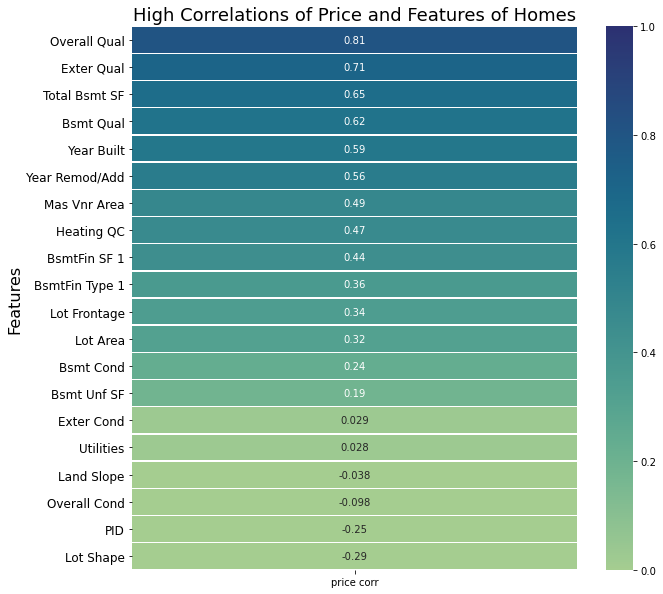

In [53]:
# creating a heatmap of high correlation columns with sale price
# used code from lesson 

# mask = np.zeros_like(corr)
# mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10,10))

sns.heatmap(high_corr[:20].sort_values(by='price corr', ascending=False), 
            annot=True,
            linewidth = 0.5,
            vmin=0,
            vmax=1,
            cmap='crest')
plt.title('High Correlations of Price and Features of Homes', size=18)
# plt.xlabel('Correlation', size=16)
plt.ylabel('Features', size=16)
plt.yticks(rotation=0, 
           size=12, );

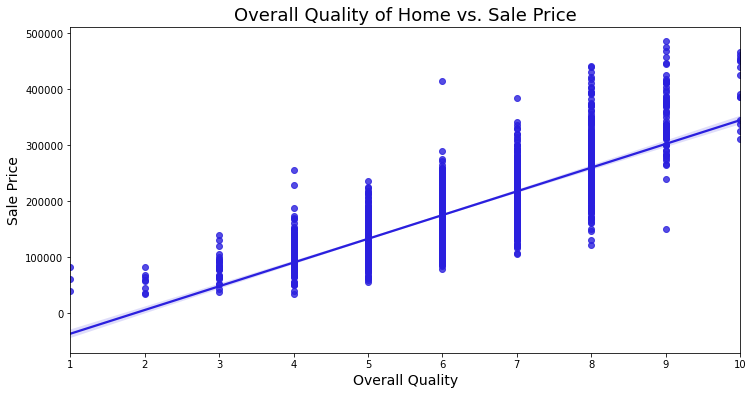

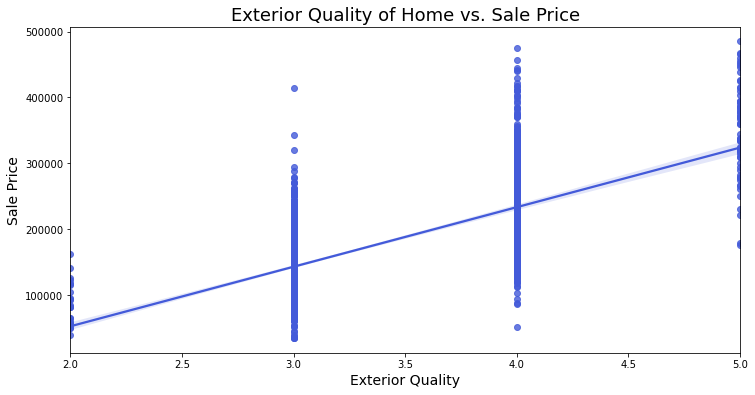

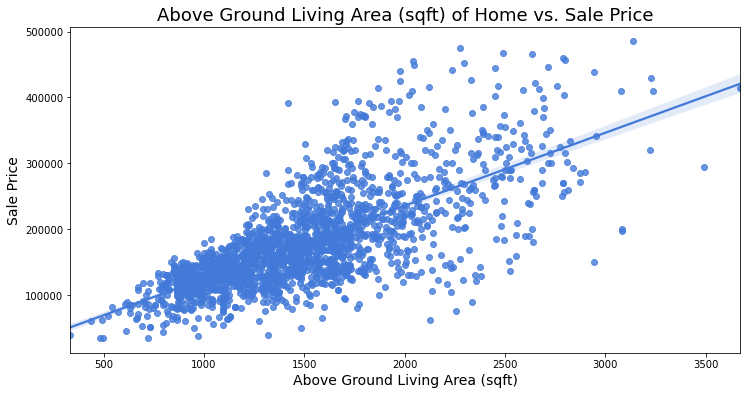

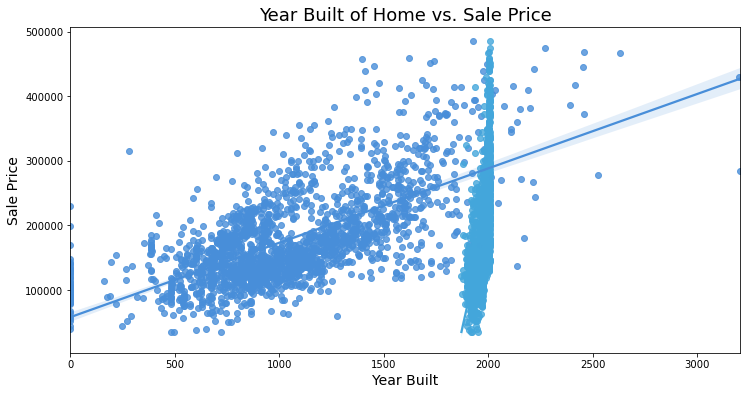

In [54]:
plt.figure(figsize=(12,6))

sns.regplot(x = 'Overall Qual',
                y = 'SalePrice', 
                data = train_full,
                color = '#2A1FDE')
plt.title('Overall Quality of Home vs. Sale Price', size=18)
plt.xlabel('Overall Quality', size=14)
plt.ylabel('Sale Price', size=14);

plt.figure(figsize=(12,6))

sns.regplot(x = 'Exter Qual',
                y = 'SalePrice', 
                data = train_full,
                color = '#435AD9')
plt.title('Exterior Quality of Home vs. Sale Price', size=18)
plt.xlabel('Exterior Quality', size=14)
plt.ylabel('Sale Price', size=14);

plt.figure(figsize=(12,6))

sns.regplot(x = 'Gr Liv Area',
                y = 'SalePrice', 
                data = train_full,
                color = '#437AD9')
plt.title('Above Ground Living Area (sqft) of Home vs. Sale Price', size=18)
plt.xlabel('Above Ground Living Area (sqft)', size=14)
plt.ylabel('Sale Price', size=14);

plt.figure(figsize=(12,6))

sns.regplot(x = 'Total Bsmt SF',
                y = 'SalePrice', 
                data = train_full,
                color = '#488ED9')
plt.title('Total Basement (sqft) of Home vs. Sale Price', size=18)
plt.xlabel('Total Basement (sqft)', size=14)
plt.ylabel('Sale Price', size=14);

sns.regplot(x = 'Year Built',
                y = 'SalePrice', 
                data = train_full,
                color = '#43A6DB')
plt.title('Year Built of Home vs. Sale Price', size=18)
plt.xlabel('Year Built', size=14)
plt.ylabel('Sale Price', size=14);

### <div align="center"> ** Interpretation ** </div>

* #### We can see a linear relationship between overall quality, exterior quality, above ground living area, and total basement area of homes and their sale prices. The higher the quality or more sq.ft., the higher the sale price.


## <div align="center"> Linear Regression Modeling

In [55]:
# checking corr index to use for features

high_corr.index

Index(['PID', 'Lot Frontage', 'Lot Area', 'Lot Shape', 'Utilities',
       'Land Slope', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add',
       ...
       'Lot Config_FR2', 'Lot Config_FR3', 'Lot Config_Inside', 'Heating_GasW',
       'Heating_Grav', 'Heating_OthW', 'Heating_Wall', 'Central Air_Y',
       'Misc Feature_Shed', 'Misc Feature_TenC'],
      dtype='object', name='Id', length=183)

In [56]:
# Using mutual_info_regression to find dependancy values of 'SalePrice' and highly correlated columns
# code inspo from https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/
mutual = mutual_info_regression(train_full[list(high_corr.index)], train_full['SalePrice'])
# creating a df of features and dependancy values
feature_dependancy = pd.DataFrame({'features': train_full[list(high_corr.index)],
                                   'dependancy': mutual}).set_index('features')
feature_dependancy

,dependancy
features,
PID,0.229642
Lot Frontage,0.222565
Lot Area,0.147228
Lot Shape,0.080947
Utilities,0.000000
...,...
Heating_OthW,0.001903
Heating_Wall,0.010608
Central Air_Y,0.070089


In [57]:
# filtering dependancy to only certain threshold to limit features
high_dependancy = feature_dependancy[(feature_dependancy['dependancy'] >= 0.00015) | (feature_dependancy['dependancy'] <= -0.00015)].copy()
        
high_dependancy

,dependancy
features,
PID,0.229642
Lot Frontage,0.222565
Lot Area,0.147228
Lot Shape,0.080947
Land Slope,0.003803
...,...
Heating_Grav,0.006091
Heating_OthW,0.001903
Heating_Wall,0.010608


In [58]:
# creating our X (features) and y (target) using our highly dependant features

high_dependancy.drop(index=['SalePrice', 'PID'], inplace=True)
features_1 = list(high_dependancy.index)
X = train_full[features_1].copy()

# doing same thing to our test data as our train data
test_features_1 = test_full[features_1].copy()

y = train_full['SalePrice']

X.head()

,Lot Frontage,Lot Area,Lot Shape,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,...,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Central Air_Y,Misc Feature_Shed
Id,,,,,,,,,,,,,,,,,,,,,
109,68.663895,13517,2,2,6,8,1976,2005,289.0,4,...,1,0,0,0,0,0,0,0,1,0
544,43.000000,11492,2,2,7,5,1996,1997,132.0,4,...,1,0,0,0,0,0,0,0,1,0
153,68.000000,7922,3,2,5,7,1953,2007,0.0,3,...,0,0,0,1,0,0,0,0,1,0
318,73.000000,9802,3,2,5,5,2006,2007,0.0,3,...,0,0,0,1,0,0,0,0,1,0
255,82.000000,14235,2,2,6,8,1900,1993,0.0,3,...,0,0,0,1,0,0,0,0,1,0


In [59]:
# checking first 10 values of y

y[:10]

Id
109     130500
544     220000
153     109000
318     174000
255     138500
138     190000
2827    140000
145     142000
1942    112500
1956    135000
Name: SalePrice, dtype: int64

In [60]:
def modelplots(a, b, n, x, y, color, s, marker, linecolor1, 
              linecolor2, xlabel, xsize, ylabel, ysize,
              labelslist, legendtitle, title, titlesize):

    ax = plt.subplot(a,b,n)
    sns.regplot(x = x, y = y,
                color = color,
                ci=None, 
                scatter_kws = {'s': s},
                marker=marker,
                line_kws = {'color': linecolor1},
                label = True)
    plt.axhline(y.mean(), color = linecolor2)
    plt.xlabel(xlabel, size=xsize)
    plt.ylabel(ylabel, size=ysize)
    labels = labelslist
    plt.legend(title = legendtitle, loc=2, labels=labels)
    plt.title(title, size=titlesize)

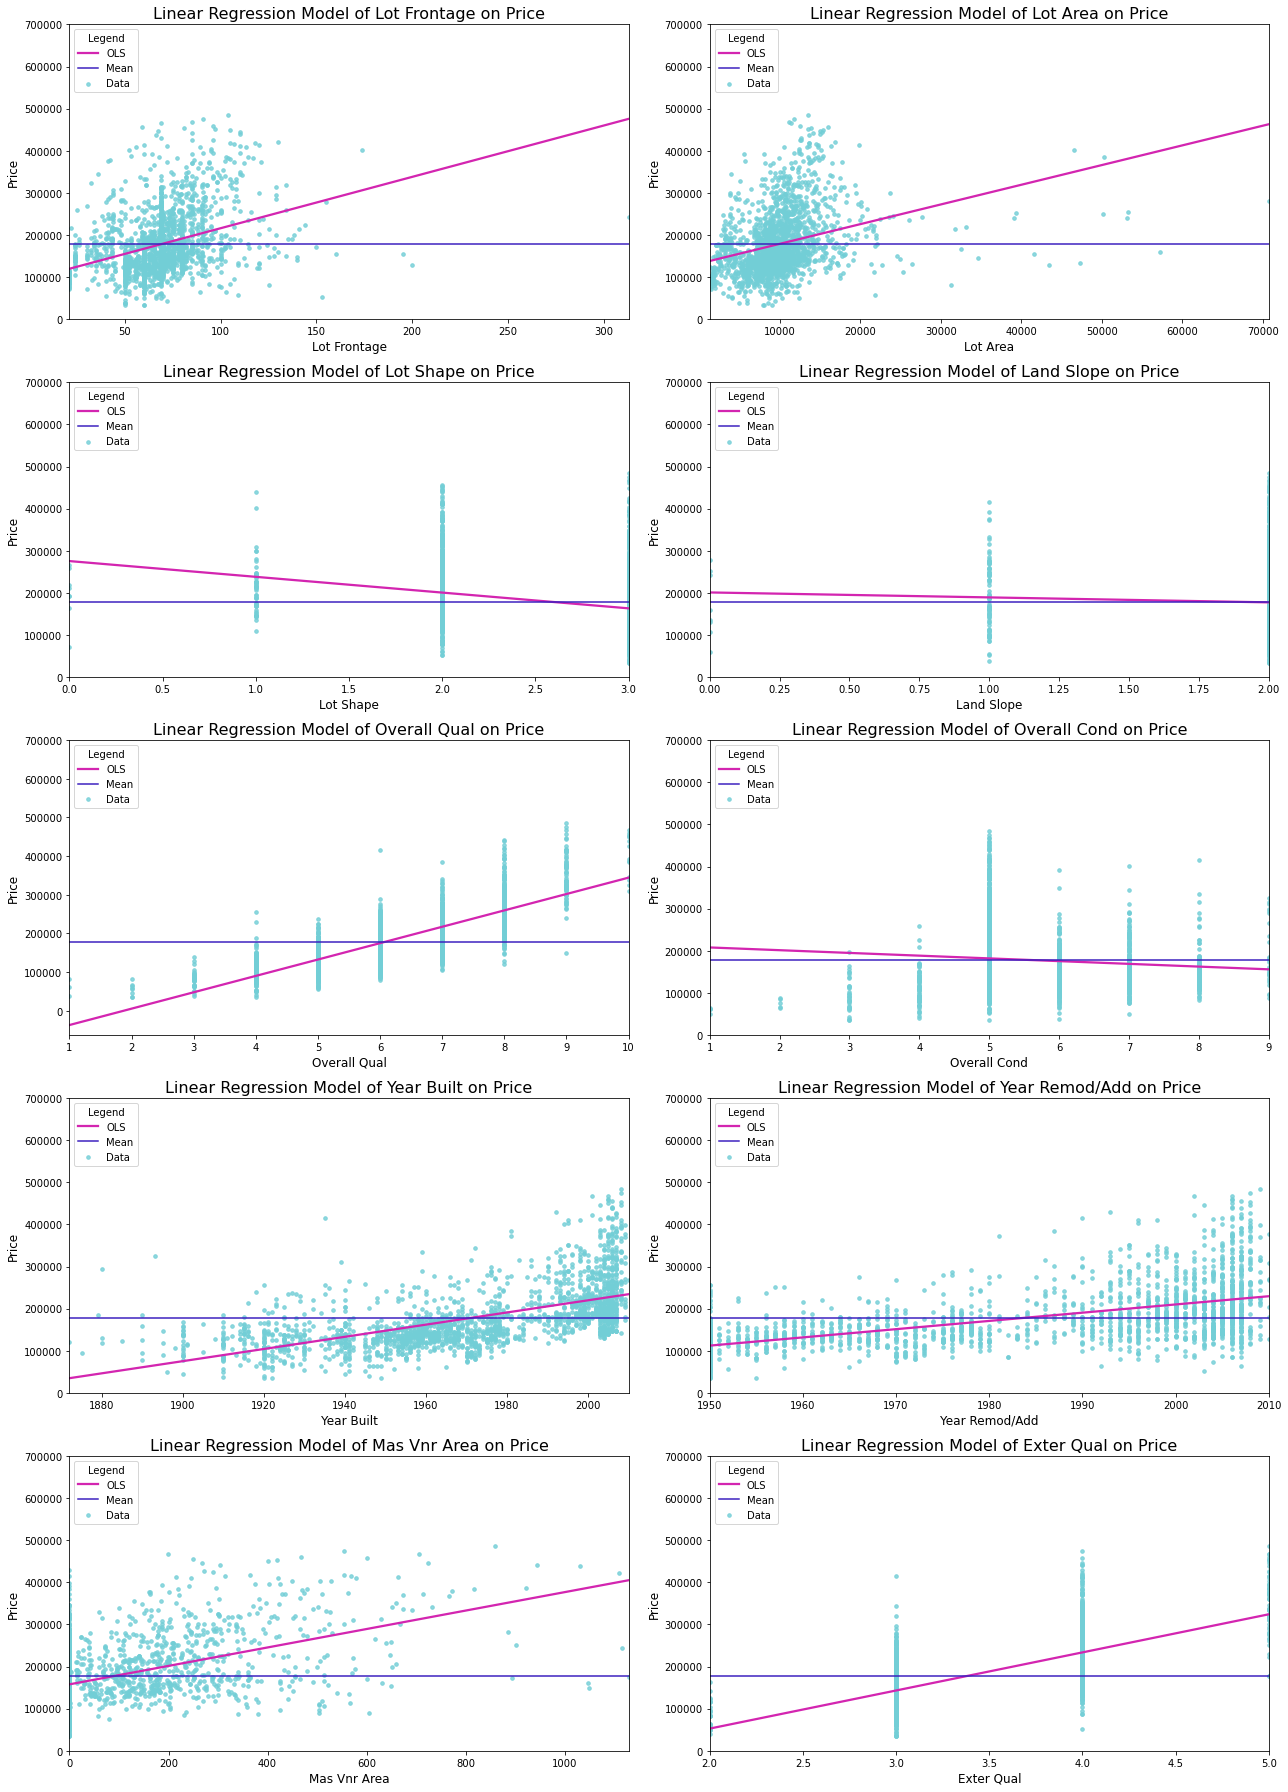

In [61]:
# code help from https://www.pauldesalvo.com/how-to-automatically-create-a-series-subplots-from-a-dataframe-using-a-for-loop-in-python/
# and https://stackoverflow.com/questions/66705955/creating-subplots-through-a-loop-from-a-dataframe
Xplot = X.iloc[:,:10]

fig = plt.figure(1, figsize=(18,25))

for i, col in enumerate(Xplot, 1):

        modelplots(5, 2, i, Xplot[col], y, '#72CED6', 13, 'o', '#D325B0',
                   '#3A1FBE', col, 12, 'Price', 12, ['OLS', 'Mean', 'Data'],
                   'Legend', f'Linear Regression Model of {col} on Price', 16)
        plt.yticks(range(0, 800000, 100000))
        plt.tight_layout();

In [62]:
# checking number of rows

print(X.shape)
print(test_features_1.shape)
print(y.shape)

(2006, 143)
(878, 143)
(2006,)


In [63]:
# checking missing values

X.isna().sum()

Lot Frontage         0
Lot Area             0
Lot Shape            0
Land Slope           0
Overall Qual         0
                    ..
Heating_Grav         0
Heating_OthW         0
Heating_Wall         0
Central Air_Y        0
Misc Feature_Shed    0
Length: 143, dtype: int64

In [64]:
# checking test data missing values

test_features_1.isna().sum()

Lot Frontage         0
Lot Area             0
Lot Shape            0
Land Slope           0
Overall Qual         0
                    ..
Heating_Grav         0
Heating_OthW         0
Heating_Wall         0
Central Air_Y        0
Misc Feature_Shed    0
Length: 143, dtype: int64

In [65]:
# replacing missing values with 0
test_features_1.fillna(0, inplace=True)
test_features_1.isna().sum()

Lot Frontage         0
Lot Area             0
Lot Shape            0
Land Slope           0
Overall Qual         0
                    ..
Heating_Grav         0
Heating_OthW         0
Heating_Wall         0
Central Air_Y        0
Misc Feature_Shed    0
Length: 143, dtype: int64

In [66]:
# instantiating linear regression model

lr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2021)
lr.fit(X_train, y_train)

LinearRegression()

In [67]:
# checking number of rows of each dataset
# code from GA class lesson 3.04

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1504, 143)
(502, 143)
(1504,)
(502,)


In [68]:
# Creating a function that returns r2 score from actual target values and predictions

def r2_func(estimator, X, y):
    y_preds = estimator.predict(X)
    r2 = r2_score(y, y_preds)
    return r2

r2 = r2_func(lr, X_train, y_train)
r2

0.9340591720489126

In [69]:
# Creating a function that takes in variables, predictions, and r2 and returns adjusted r2

def r2_adj(X, y, r2):

    K = len(X.columns)
    n = len(y)
    
    return (1 - ((1 - r2)*(n-1) / (n - K - 1)))
    
r2_adj(X_train, y_train, r2)

0.9271256879334674

In [70]:
# Creating function that returns metrics of a model using variables and split data and r2 score

def reg_metrics(var, X, y, X_train, X_test, y_train, y_test):
#     Instantiating model, fitting model, creating predictions from model
#     var = model()
#     X_train, X_test, y_train, y_test = train_test_split(X, y)
#     var.fit(X_train, y_train)
#     var.score(X_train, y_train)
    train_preds = var.predict(X_train)
    test_preds = var.predict(X_test)
#     scaling data to compare scores
    sc = StandardScaler()
    Z_train = sc.fit_transform(X_train)
    Z_test = sc.transform(X_test)
#     instantiating and fitting ols model
    ols = LinearRegression()
    ols.fit(Z_train, y_train)
    
#     creating variables of metrics
    CVS_mean = (cross_val_score(var, X, y, cv=5)).mean()
    ols_train = ols.score(Z_train, y_train)
    ols_test = ols.score(Z_test, y_test)
    y_train_baseline = [y_train.mean()]*len(y_train)
    y_test_baseline = [y_train.mean()]*len(y_test)
    baseline_train_mse = mean_squared_error(y_train, y_train_baseline)
    baseline_test_mse = mean_squared_error(y_test, y_test_baseline)
    baseline_train_rmse = mean_squared_error(y_train, y_train_baseline)**0.5
    baseline_test_rmse = mean_squared_error(y_test, y_test_baseline)**0.5
    MSE_train = mean_squared_error(y_train, train_preds)
    MSE_test = mean_squared_error(y_test, test_preds)
    RMSE_train = mean_squared_error(y_train, train_preds)**0.5
    RMSE_test = mean_squared_error(y_test, test_preds)**0.5
    R2 = r2_func(var, X_train, y_train)
    R2_adj = r2_adj(X_train, y_train, r2)
    
    return (f'Cross Value Score Mean: {CVS_mean}',
            f'OLS Training Score: {ols_train}',
            f'OLS Testing Score: {ols_train}',
            f'Baseline Mean Squared Error Training Data: {baseline_train_mse}',
            f'Baseline Mean Squared Error Testing Data: {baseline_test_mse}',            
            f'Mean Squared Error Training Data: {MSE_train}', 
            f'Mean Squared Error Testing Data: {MSE_test}',
            f'Difference in Training Model and Baseline MSE: {baseline_train_mse - MSE_train}',
            f'Difference in Testing Model and Baseline MSE: {baseline_test_mse - MSE_test}',
            f'Baseline Root Mean Squared Error Training Data: {baseline_train_rmse}',
            f'Baseline Root Mean Squared Error Testing Data: {baseline_test_rmse}', 
            f'Root Mean Squared Error Training Data: {RMSE_train}',
            f'Root Mean Squared Error Testing Data: {RMSE_test}', 
            f'Difference in Training Model and Baseline RMSE: {baseline_train_rmse - RMSE_train}',
            f'Difference in Testing Model and Baseline RMSE: {baseline_test_rmse - RMSE_test}',
            f'R2 Score: {R2}',
            f'R2 Adjusted Score: {R2_adj}')
    
# Linear Regression model metrics on X and y  
print (" Linear Regression ".center(68, "="))
lr_metrics = reg_metrics(lr, X, y, X_train, X_test, y_train, y_test)
lr_metrics

======================== Linear Regression =========================


('Cross Value Score Mean: 0.9100319053426285',
 'OLS Training Score: 0.9340583028171616',
 'OLS Testing Score: 0.9340583028171616',
 'Baseline Mean Squared Error Training Data: 5513029308.904282',
 'Baseline Mean Squared Error Testing Data: 4820417569.133058',
 'Mean Squared Error Training Data: 363533717.1477592',
 'Mean Squared Error Testing Data: 537429564.3326002',
 'Difference in Training Model and Baseline MSE: 5149495591.756522',
 'Difference in Testing Model and Baseline MSE: 4282988004.8004575',
 'Baseline Root Mean Squared Error Training Data: 74249.77649060152',
 'Baseline Root Mean Squared Error Testing Data: 69429.22705268335',
 'Root Mean Squared Error Training Data: 19066.560181316378',
 'Root Mean Squared Error Testing Data: 23182.52713430096',
 'Difference in Training Model and Baseline RMSE: 55183.21630928514',
 'Difference in Testing Model and Baseline RMSE: 46246.69991838239',
 'R2 Score: 0.9340591720489126',
 'R2 Adjusted Score: 0.9271256879334674')

### <div align="center">  ** Interpretation: ** </div>

There is a big difference between our Baseline RMSE and our model's RMSE for both the training and the testing data which is great. That means that our model predicts the prices much better than the baselines with no features.

Our training RMSE is about 3-4K higher than our testing RMSE, which is not bad, but could be closer together for more accuracy in predicting new data.

The adjusted $r^2$ score of the model is $0.927$ which means that about $92.7\%$ of the variability in the predictions of the target are explained by the features in the linear regression model.

Our cross value score is about $91\%$ which is very close to our $r^2$ and shows that our model is effective at predicting new data about the same as the training data.

In [71]:
# Instantiating empty df
comp = pd.DataFrame()
# creating comparison df for predictions of each model
comp['price'] = y_test
comp['lr_preds'] = lr.predict(X_test)
comp['difference'] = comp['lr_preds'] - comp['price']

In [72]:
# Creating df of coefficients with features as column names
def coef_df(X, model):
    coefs = pd.DataFrame()
    coefs['features'] = X.columns
    coefs['coef'] = model.coef_
    return coefs

coef_df(X, lr).sort_values(by='coef', ascending=False)

,features,coef
81,Exterior 2nd_AsphShn,34916.768845
106,Condition 1_PosA,29697.521346
67,Neighborhood_StoneBr,24946.341867
96,House Style_2.5Unf,22077.106060
82,Exterior 2nd_CmentBd,21254.755201
...,...,...
123,MS SubClass_190,-23235.408562
60,Neighborhood_NWAmes,-27162.647620
121,MS SubClass_160,-29848.869920
95,House Style_2.5Fin,-36330.869108


### <div align="center">  ** Interpretation: ** </div>

- For homes in the neighborhood of Green Hill, the prediction price will go up by \\$95816.41, all else equal. 

- Homes with common brick on the exterior will lower the prediction price by \\$54109.08, all else equal.


In [73]:
# calculating residuals
y_preds = lr.predict(X_test)
resids = y_test - y_preds
resids.sort_values(ascending=False)

Id
2736     79055.586153
1539     76058.565749
1427     65232.331816
1588     54698.346373
348      54227.202949
            ...      
1002    -60315.151039
470     -62020.127079
1956    -64264.997343
1783   -129434.073889
1183   -189182.341415
Name: SalePrice, Length: 502, dtype: float64

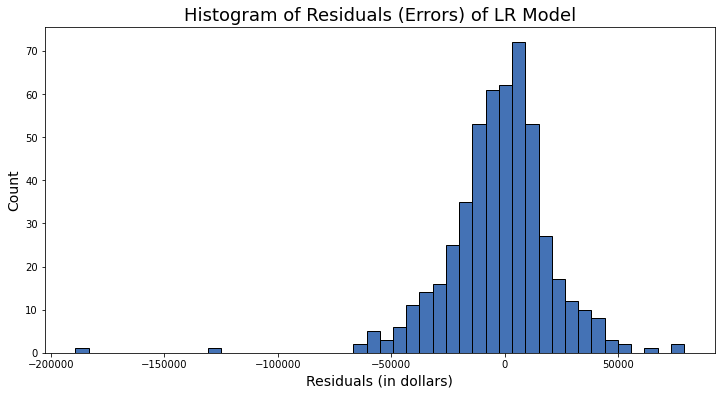

In [74]:
plt.figure(figsize=(12, 6))

sns.histplot(resids, color='#05439C')
plt.title('Histogram of Residuals (Errors) of LR Model', size=18)
plt.xlabel('Residuals (in dollars)', size=14)
plt.ylabel('Count', size=14);

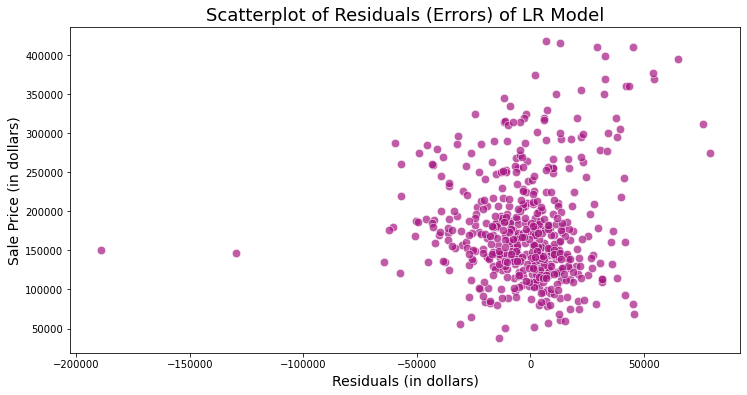

In [75]:
plt.figure(figsize=(12, 6))

sns.scatterplot(x = resids, y = y_test, color='#A51582', s=70, alpha=0.7)
plt.title('Scatterplot of Residuals (Errors) of LR Model', size=18)
plt.xlabel('Residuals (in dollars)', size=14)
plt.ylabel('Sale Price (in dollars)', size=14);

### <div align="center">  ** Interpretation: ** </div>

* Except for a few outliers, the residuals (errors) have a normal distribution
* Heteroscedasticity: they seem to be clustered between the 100,000 to 200,000 'Sale Price' and between the -50,000 to 50,000 range in errors.

## <div align="center"> Scaled Data Linear Regression Modeling

In [76]:
# Scaling our data

sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

## <div align="center"> OLS (Ordinary Least Squares) Linear Regression Modeling

In [77]:
def scaled_metrics(model, X, Xtrain, Xtest, ytrain, ytest):
    # creating predictions
    train_preds = model.predict(Xtrain)
    test_preds = model.predict(Xtest)
    
    # cross value score of scaled data in ols model
    train_cvs = cross_val_score(model, Xtrain, ytrain)
    print (f" {model} ".center(52, "=")) # code from GA class lesson 4.02
    print (f'Model Training CVS Score: {train_cvs.mean()}')
    print ('----------------------------------------------------')
    
    # r2 Scores of OLS model on training and testing data
    train_r2 = model.score(Xtrain, ytrain)
    test_r2 = model.score(Xtest, ytest)
    print(f'Model Training r2 Score: {train_r2}')
    print ('----------------------------------------------------')
    print(f'Model Testing r2 Score: {test_r2}')
    print ('----------------------------------------------------')
    print(f'Model Adjusted r2 Score: {r2_adj(X, ytest, test_r2)}')
    
    # creating baseline for train and test data
    train_baseline = [ytrain.mean()]*len(ytrain)
    test_baseline = [ytrain.mean()]*len(ytest)
    train_baseline_rmse = mean_squared_error(ytrain, train_baseline)**0.5
    test_baseline_rmse = mean_squared_error(ytest, test_baseline)**0.5
    print (" Baseline RMSE ".center(52, "="))
    print(f'Baseline RMSE for train set: {train_baseline_rmse}')
    print(f'Baseline RMSE for test set: {test_baseline_rmse}')
    
    # Root Mean Squared Error of OLS predictions
    train_rmse = mean_squared_error(y_train, train_preds)**0.5
    test_rmse = mean_squared_error(y_test, test_preds)**0.5
    print (" model RMSE ".center(52, "="))
    print (f'Train Root Mean Squared Error: {train_rmse}')
    print (f'Test Root Mean Squared Error: {test_rmse}')

    # Difference between RMSE and baseline RMSE
    print (" Difference between Model and Baseline RMSE ".center(78, "="))
    print (f'Difference between train RMSE and baseline train RMSE: {(train_baseline_rmse) - (train_rmse)}')
    print (f'Difference between test RMSE and baseline test RMSE: {(test_baseline_rmse) - (test_rmse)}')

In [78]:
# Instantiating OLS (Ordinary Least Squares) Linear Regression model on scaled X and y
ols = LinearRegression()
ols.fit(Z_train, y_train)

scaled_metrics(ols, X, Z_train, Z_test, y_train, y_test)

================ LinearRegression() ================
Model Training CVS Score: -9.35767864576324e+19
----------------------------------------------------
Model Training r2 Score: 0.9340583028171616
----------------------------------------------------
Model Testing r2 Score: 0.8885440252078914
----------------------------------------------------
Model Adjusted r2 Score: 0.8440239011987531
================== Baseline RMSE ===================
Baseline RMSE for train set: 74249.77649060152
Baseline RMSE for test set: 69429.22705268335
==================== model RMSE ====================
Train Root Mean Squared Error: 19066.685848565263
Test Root Mean Squared Error: 23175.918157795524
================= Difference between Model and Baseline RMSE =================
Difference between train RMSE and baseline train RMSE: 55183.09064203626
Difference between test RMSE and baseline test RMSE: 46253.30889488782


### <div align="center">  ** Interpretation: ** </div>

This model did not do well at all and is most likely overfit.

## <div align="center"> Ridge Regression Modeling

In [79]:
# adding ols predictions to comparison df
comp['ols_preds'] = ols.predict(Z_test)
comp['difference2'] = comp['ols_preds'] - comp['price']

In [80]:
# code from lesson notes 4.02

# r_alphas = np.linspace(0, 1000, 500)

# Instantiating ridge

ridge = RidgeCV(alphas=[2.004008016032064], scoring='r2', normalize=True, cv=5)

# Fitting ridge model
ridge.fit(Z_train, y_train)

print (scaled_metrics(ridge, X, Z_train, Z_test, y_train, y_test))

# checking best alpha
print (ridge.alpha_)

 RidgeCV(alphas=array([2.00400802]), cv=5, normalize=True, scoring='r2') 
Model Training CVS Score: 0.8562055198528947
----------------------------------------------------
Model Training r2 Score: 0.8711994814634647
----------------------------------------------------
Model Testing r2 Score: 0.8761295177338214
----------------------------------------------------
Model Adjusted r2 Score: 0.8266505262140909
================== Baseline RMSE ===================
Baseline RMSE for train set: 74249.77649060152
Baseline RMSE for test set: 69429.22705268335
==================== model RMSE ====================
Train Root Mean Squared Error: 26647.345715736643
Test Root Mean Squared Error: 24432.571900803483
================= Difference between Model and Baseline RMSE =================
Difference between train RMSE and baseline train RMSE: 47602.43077486488
Difference between test RMSE and baseline test RMSE: 44996.655151879866
None
2.004008016032064


### <div align="center">  ** Interpretation: ** </div>

The ridge regression model did not do terribly, but definitely not as good as our original Linear Regression model.

## <div align="center"> Lasso Regression Modeling

In [81]:
# adding ridge predictions to comparison df
comp['ridge_preds'] = ridge.predict(Z_test)
comp['difference3'] = comp['ridge_preds'] - comp['price']

In [82]:
# Logspace to find best alpha fit for model
# l_alphas = np.logspace(-2,0,10)

# Instantiating and fitting lasso
lasso = LassoCV(alphas = [1.0], cv=5, normalize=True, max_iter=100000).fit(Z_train, y_train)

print (scaled_metrics(lasso, X, Z_train, Z_test, y_train, y_test))

print (lasso.alpha_)

 LassoCV(alphas=[1.0], cv=5, max_iter=100000, normalize=True) 
Model Training CVS Score: 0.9131875657571824
----------------------------------------------------
Model Training r2 Score: 0.9336370322996628
----------------------------------------------------
Model Testing r2 Score: 0.8914342370517175
----------------------------------------------------
Model Adjusted r2 Score: 0.8480685831366215
================== Baseline RMSE ===================
Baseline RMSE for train set: 74249.77649060152
Baseline RMSE for test set: 69429.22705268335
==================== model RMSE ====================
Train Root Mean Squared Error: 19127.492934460253
Test Root Mean Squared Error: 22873.452185842503
================= Difference between Model and Baseline RMSE =================
Difference between train RMSE and baseline train RMSE: 55122.283556141265
Difference between test RMSE and baseline test RMSE: 46555.774866840846
None
1.0


### <div align="center">  ** Interpretation: ** </div>

The Lasso Regression model is the most similar to the original Linear Regression (non-scaled data) and is also a pretty good model. The adjusted $r^2$ here is not as good as the LR model.

In [83]:
# adding lasso predictions to comparison df
comp['lasso_preds'] = lasso.predict(Z_test)
comp['difference4'] = comp['lasso_preds'] - comp['price']

## <div align="center"> Linear Regression Modeling with Polynomial Features

In [84]:
high_dependancy_X = feature_dependancy[(feature_dependancy['dependancy'] >= 0.057) | (feature_dependancy['dependancy'] <= -0.057)].copy()

high_dependancy_X.drop(index=['SalePrice', 'PID'], inplace=True)
high_dependancy_X

,dependancy
features,
Lot Frontage,0.222565
Lot Area,0.147228
Lot Shape,0.080947
Overall Qual,0.576276
Overall Cond,0.154320
Year Built,0.423520
Year Remod/Add,0.323571
Mas Vnr Area,0.156299
Exter Qual,0.338983


In [85]:
# Creating polynomial features (features with other features)
# used code from class lecture 4.02

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = pd.DataFrame(poly.fit_transform(train_full[high_dependancy_X.index]), columns = poly.get_feature_names(high_dependancy_X.index))
drop = []
for col in X_poly:
        if col in X.columns:
            drop.append(col)
X_poly.drop(columns=drop, inplace=True)
X_transformed = X.join(other = X_poly)
X_transformed.head()

,Lot Frontage,Lot Area,Lot Shape,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,...,MS SubClass_60 MS Zoning_RM,MS SubClass_60 Foundation_CBlock,MS SubClass_60 Foundation_PConc,MS SubClass_60 Central Air_Y,MS Zoning_RM Foundation_CBlock,MS Zoning_RM Foundation_PConc,MS Zoning_RM Central Air_Y,Foundation_CBlock Foundation_PConc,Foundation_CBlock Central Air_Y,Foundation_PConc Central Air_Y
Id,,,,,,,,,,,,,,,,,,,,,
109,68.663895,13517,2,2,6,8,1976,2005,289.0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
544,43.000000,11492,2,2,7,5,1996,1997,132.0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
153,68.000000,7922,3,2,5,7,1953,2007,0.0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
318,73.000000,9802,3,2,5,5,2006,2007,0.0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
255,82.000000,14235,2,2,6,8,1900,1993,0.0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [86]:
# replacing missing values with 0

X_transformed.fillna(0, inplace=True)
X_transformed.isna().sum()

Lot Frontage                          0
Lot Area                              0
Lot Shape                             0
Land Slope                            0
Overall Qual                          0
                                     ..
MS Zoning_RM Foundation_PConc         0
MS Zoning_RM Central Air_Y            0
Foundation_CBlock Foundation_PConc    0
Foundation_CBlock Central Air_Y       0
Foundation_PConc Central Air_Y        0
Length: 1178, dtype: int64

In [87]:
# Creating Polynomial features from columns in test_features_1 dataframe

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
test_poly = pd.DataFrame(poly.fit_transform(test_features_1[high_dependancy_X.index]), columns = poly.get_feature_names(high_dependancy_X.index))
drop = []
for col in test_poly:
        if col in test_features_1.columns:
            drop.append(col)

test_poly.drop(columns=drop, inplace=True)
test_features_poly = test_features_1.join(other = test_poly)
test_features_poly.head()

,Lot Frontage,Lot Area,Lot Shape,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,...,MS SubClass_60 MS Zoning_RM,MS SubClass_60 Foundation_CBlock,MS SubClass_60 Foundation_PConc,MS SubClass_60 Central Air_Y,MS Zoning_RM Foundation_CBlock,MS Zoning_RM Foundation_PConc,MS Zoning_RM Central Air_Y,Foundation_CBlock Foundation_PConc,Foundation_CBlock Central Air_Y,Foundation_PConc Central Air_Y
Id,,,,,,,,,,,,,,,,,,,,,
2658,69.000000,9142,3,2,6,8,1910,1950,0.0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2718,69.545961,9662,2,2,5,4,1977,1977,0.0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2414,58.000000,17104,2,2,7,5,2006,2006,0.0,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989,60.000000,8520,3,2,5,6,1923,2006,0.0,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
625,69.545961,9500,2,2,6,5,1963,1963,247.0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
# replacing missing values with 0

test_features_poly.fillna(0, inplace=True)
test_features_poly.isna().sum()

Lot Frontage                          0
Lot Area                              0
Lot Shape                             0
Land Slope                            0
Overall Qual                          0
                                     ..
MS Zoning_RM Foundation_PConc         0
MS Zoning_RM Central Air_Y            0
Foundation_CBlock Foundation_PConc    0
Foundation_CBlock Central Air_Y       0
Foundation_PConc Central Air_Y        0
Length: 1178, dtype: int64

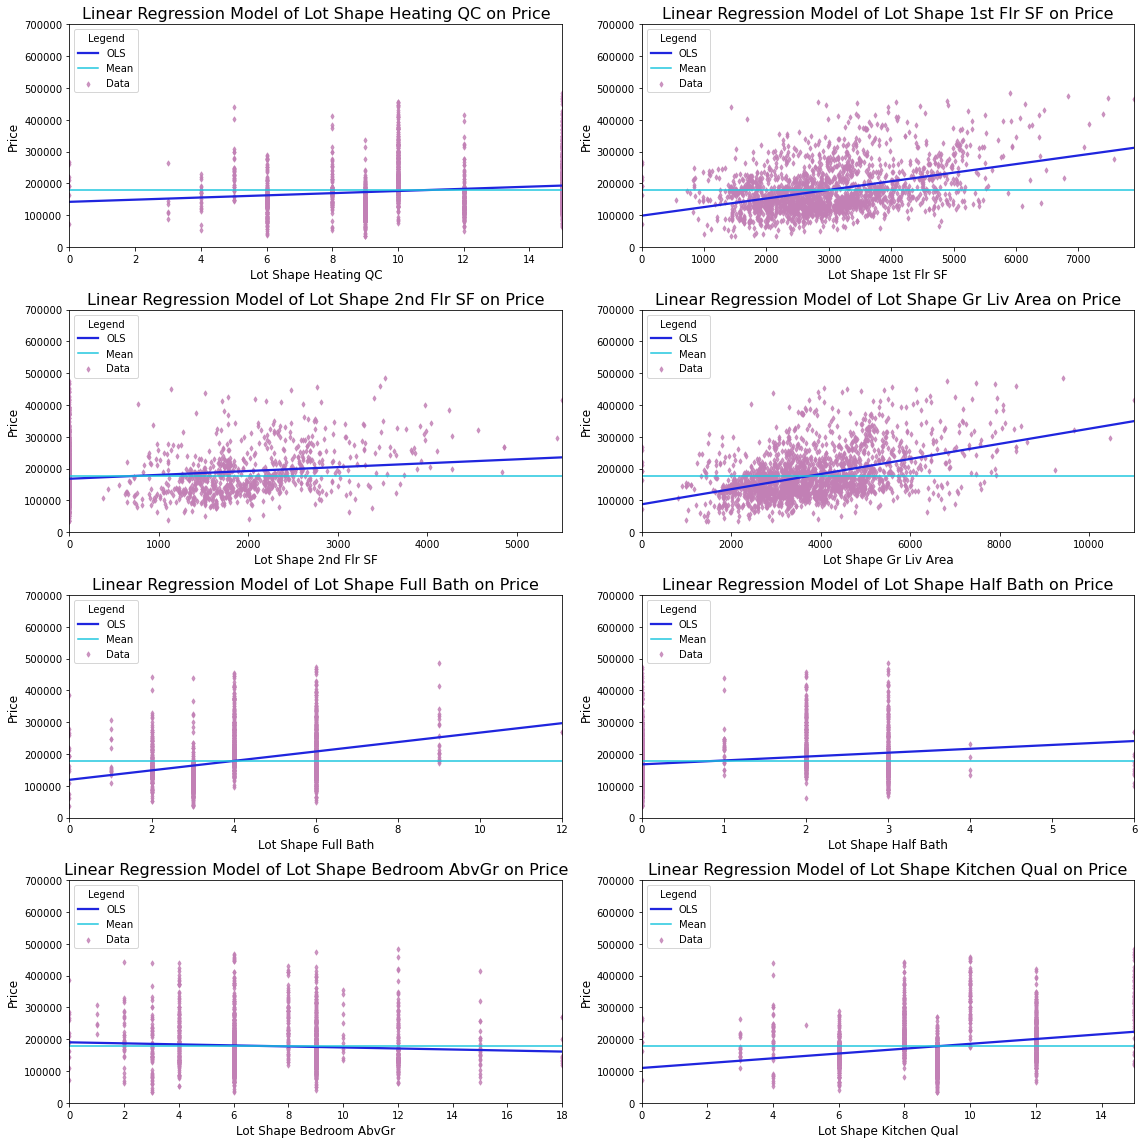

In [89]:
poly_plot = X_poly.iloc[:,100:108]

fig = plt.figure(1, figsize=(16,16))

for i, col in enumerate(poly_plot, 1):

        modelplots(4, 2, i, poly_plot[col], y, '#C280B5', 13, 'd', '#1F25DE',
                   '#1FC6DE', col, 12, 'Price', 12, ['OLS', 'Mean', 'Data'],
                   'Legend', f'Linear Regression Model of {col} on Price', 16)
        plt.yticks(range(0, 800000, 100000))
        plt.tight_layout();

In [90]:
# checking number of rows and columns of new X and test df

print(X_transformed.shape)
print(test_features_poly.shape)

(2006, 1178)
(878, 1178)


In [91]:
# adding 'SalePrice' column to features just to use for correlation

X_transformed['SalePrice'] = train['SalePrice']

In [92]:
# only correlations higher than threshold or lower than threshold in a df

corr = X_transformed.corr()
corr_price_X = corr['SalePrice']

high_corr_X = {}
for index, value in corr_price_X.items():
    if value >= 0.04 or value <= -0.04:
        high_corr_X[index] = value
        
high_corr_X
high_corr_X = pd.DataFrame(high_corr_X.items(), columns=['Id', 'price corr']).set_index('Id')
high_corr_X.sort_values(by='price corr', ascending=False)

,price corr
Id,
SalePrice,1.000000
Overall Qual,0.806726
Gr Liv Area,0.711685
Exter Qual,0.709254
Kitchen Qual,0.688917
...,...
MS SubClass_30,-0.258822
Lot Shape,-0.285670
MS Zoning_RM,-0.294407


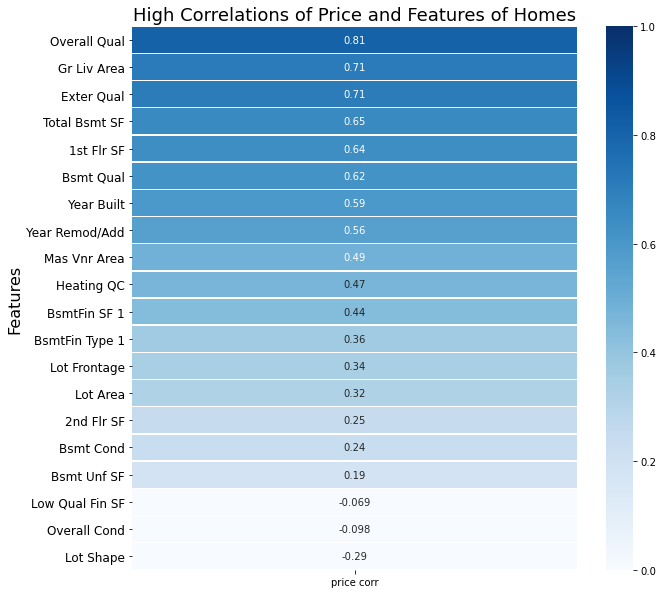

In [93]:
# Heatmap of top 20 features correlation with 'SalePrice'

plt.figure(figsize=(10,10))

sns.heatmap(high_corr_X[:20].sort_values(by='price corr', ascending=False), 
            annot=True,
            cmap='Blues',
            linewidth = 0.5,
            vmin=0,
            vmax=1,
            )
plt.title('High Correlations of Price and Features of Homes', size=18)
# plt.xlabel('Correlation', size=16)
plt.ylabel('Features', size=16)
plt.yticks(rotation=0, 
           size=12, );

In [94]:
# checking corr index for use in features

list(high_corr_X.index)

['Lot Frontage',
 'Lot Area',
 'Lot Shape',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'Exter Qual',
 'Bsmt Qual',
 'Bsmt Cond',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Heating QC',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'Kitchen Qual',
 'TotRms AbvGrd',
 'Functional',
 'Fireplaces',
 'Fireplace Qu',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage Area',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 'Screen Porch',
 'Fence',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 

In [95]:
# Using mutual_info_regression to find dependancy values of 'SalePrice' and highly correlated columns
# code inspo from https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/
mutual_X = mutual_info_regression(X_transformed[list(high_corr_X.index)], train_full['SalePrice'])
# creating a df of features and dependancy values
feature_dependancy_X = pd.DataFrame({'features': X_transformed[list(high_corr_X.index)],
                                   'dependancy': mutual_X}).set_index('features')
feature_dependancy_X.sort_values('dependancy', ascending=False)

,dependancy
features,
SalePrice,5.751584
Overall Qual,0.569704
Gr Liv Area,0.477615
Garage Area,0.421415
Year Built,0.419597
...,...
1st Flr SF Garage Qual,0.000000
1st Flr SF Paved Drive,0.000000
1st Flr SF Wood Deck SF,0.000000


In [96]:
# filtering dependancy to only certain threshold to limit features
high_dependancy_X = feature_dependancy_X[(feature_dependancy_X['dependancy'] >= 0.016) | (feature_dependancy_X['dependancy'] <= -0.0016)].copy()
        
high_dependancy_X

,dependancy
features,
Lot Frontage,0.219003
Lot Area,0.148802
Lot Shape,0.066296
Overall Qual,0.569704
Overall Cond,0.140886
...,...
Garage Area Central Air_Y,0.020491
Garage Qual Central Air_Y,0.019586
Garage Cond Central Air_Y,0.017530


In [97]:
# Creating new polynomial X features 
high_dependancy_X.drop(index='SalePrice', inplace=True)
features_2 = list(high_dependancy_X.index)
XT = X_transformed[features_2].copy()

# doing same to test data as train data
test_features_poly_X = test_features_poly[features_2].copy()

XT.head()

,Lot Frontage,Lot Area,Lot Shape,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Bsmt Qual,...,Garage Finish Garage Cond,Garage Finish Paved Drive,Garage Finish Central Air_Y,Garage Cars Garage Cond,Garage Area Garage Qual,Garage Area Garage Cond,Garage Area Central Air_Y,Garage Qual Central Air_Y,Garage Cond Central Air_Y,Mas Vnr Type_None Central Air_Y
Id,,,,,,,,,,,,,,,,,,,,,
109,68.663895,13517,2,6,8,1976,2005,289.0,4,3.0,...,3.0,2.0,1.0,6.0,1320.0,1320.0,440.0,3.0,3.0,0.0
544,43.000000,11492,2,7,5,1996,1997,132.0,4,4.0,...,3.0,2.0,1.0,3.0,1224.0,1224.0,408.0,3.0,3.0,0.0
153,68.000000,7922,3,5,7,1953,2007,0.0,3,3.0,...,3.0,2.0,1.0,3.0,1341.0,1341.0,447.0,3.0,3.0,0.0
318,73.000000,9802,3,5,5,2006,2007,0.0,3,4.0,...,6.0,4.0,2.0,6.0,1320.0,1320.0,440.0,3.0,3.0,1.0
255,82.000000,14235,2,6,8,1900,1993,0.0,3,2.0,...,6.0,4.0,2.0,3.0,858.0,858.0,286.0,3.0,3.0,0.0


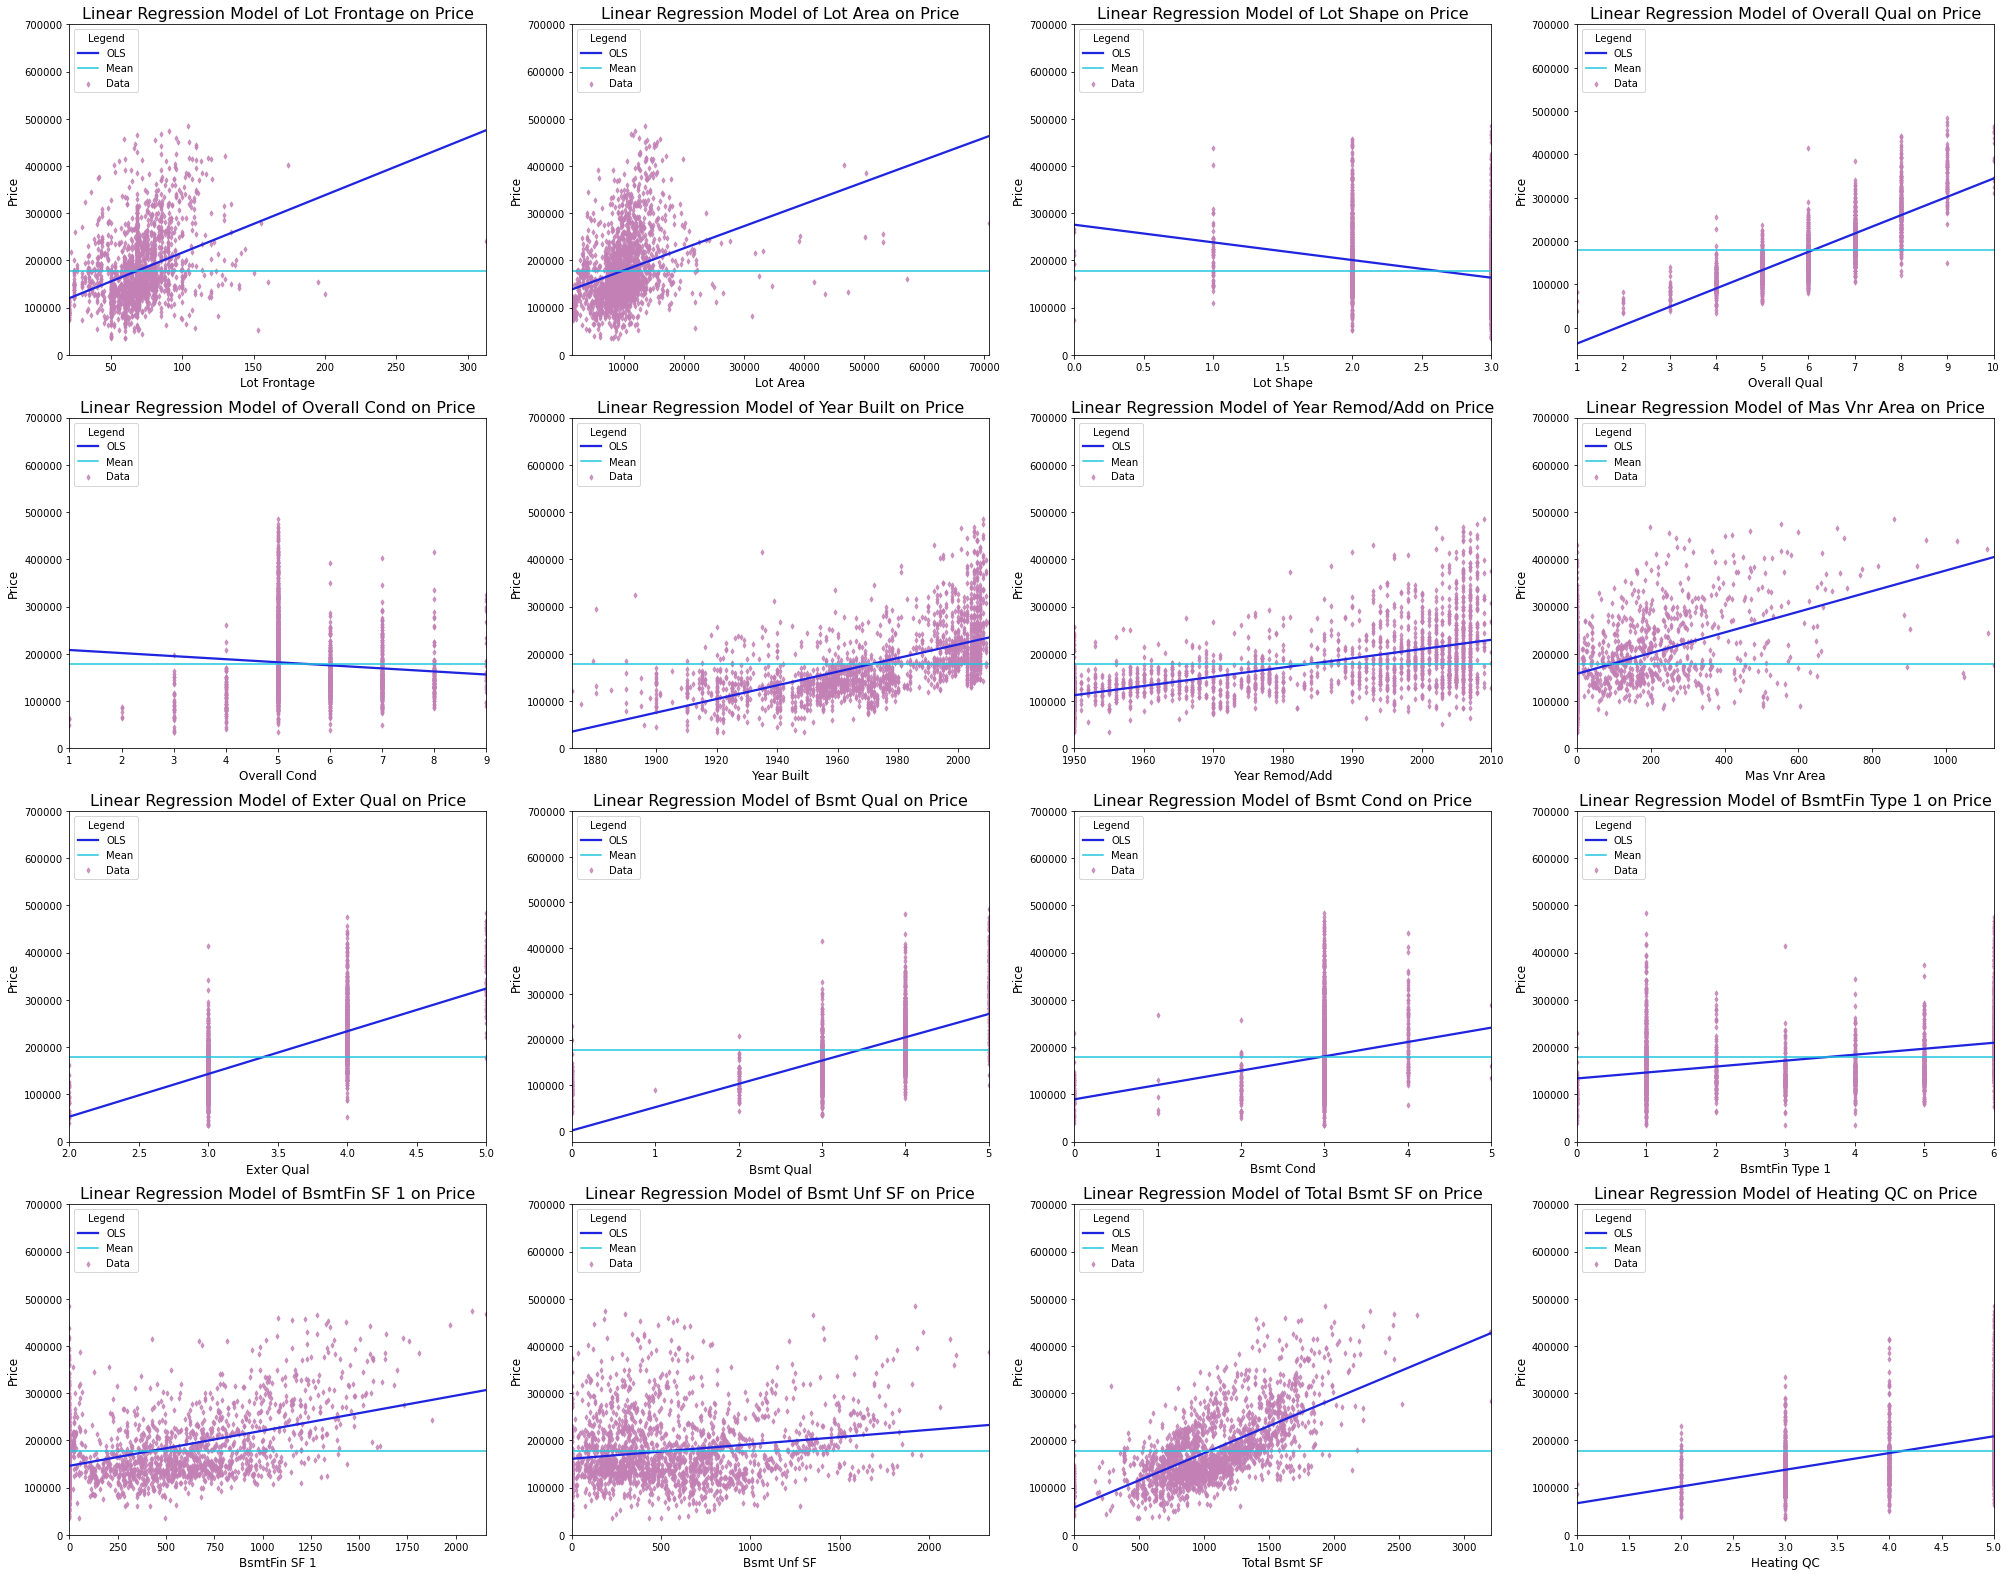

In [98]:
XT_plot = XT.iloc[:,:16]

fig = plt.figure(1, figsize=(28,22))
# fig, ax = plt.subplots(5, 3, ) 

for i, col in enumerate(XT_plot, 1):

        modelplots(4, 4, i, XT_plot[col], y, '#C280B5', 13, 'd', '#1F25DE',
                   '#1FC6DE', col, 12, 'Price', 12, ['OLS', 'Mean', 'Data'],
                   'Legend', f'Linear Regression Model of {col} on Price', 16)
        plt.yticks(range(0, 800000, 100000))
        plt.tight_layout();

In [99]:
# instantiating a new linear regression model
lr_2 = LinearRegression()
# fitting the model on our X and y
lr_2.fit(XT, y)

LinearRegression()

In [100]:
# creating train test and split model
XT_train, XT_test, yt_train, yt_test = train_test_split(XT, y, random_state=2021)

In [101]:
# new polynomial model metrics

reg_metrics(lr_2, XT, y, XT_train, XT_test, yt_train, yt_test)

('Cross Value Score Mean: 0.895539960152276',
 'OLS Training Score: 0.9258790203412701',
 'OLS Testing Score: 0.9258790203412701',
 'Baseline Mean Squared Error Training Data: 5513029308.904282',
 'Baseline Mean Squared Error Testing Data: 4820417569.133058',
 'Mean Squared Error Training Data: 426521845.568554',
 'Mean Squared Error Testing Data: 436232377.0853772',
 'Difference in Training Model and Baseline MSE: 5086507463.335728',
 'Difference in Testing Model and Baseline MSE: 4384185192.04768',
 'Baseline Root Mean Squared Error Training Data: 74249.77649060152',
 'Baseline Root Mean Squared Error Testing Data: 69429.22705268335',
 'Root Mean Squared Error Training Data: 20652.405321621838',
 'Root Mean Squared Error Testing Data: 20886.17669860564',
 'Difference in Training Model and Baseline RMSE: 53597.371168979684',
 'Difference in Testing Model and Baseline RMSE: 48543.050354077706',
 'R2 Score: 0.922633851251314',
 'R2 Adjusted Score: 0.9246891607823068')

### <div align="center">  ** Interpretation lr_2 model: ** </div>

The new Linear Regression model with 258 polynomial features included is doing even better than our original model. Our RMSE for training and testing are much closer together and the $r^2$ is $92\%$ which is great. That means $92\%$ of our features explain the variability in our prediction prices, compared to a model without features.

In [102]:
# adding lr 2 predictions to our comparison df

comp['lr2_preds'] = lr_2.predict(XT_test)
comp['difference5'] = comp['lr2_preds'] - comp['price']

In [103]:
# Creating df of coefficients with features as column names
coef_df_lr2 = coef_df(XT, lr_2)
coef_df_lr2.sort_values(by='coef', ascending=False)

,features,coef
46,Neighborhood_NridgHt,31762.501166
50,Neighborhood_StoneBr,31034.291015
39,Neighborhood_BrDale,24231.865625
45,Neighborhood_NoRidge,21471.917805
79,Land Contour_HLS,21242.576051
...,...,...
72,MS Zoning_C (all),-11260.127130
59,Exterior 1st_Wd Sdng,-11313.347031
58,Exterior 1st_VinylSd,-13628.641260
70,MS SubClass_120,-17817.680725


<ipython-input-104-428cf25bf765>:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title('Feature Coefficients', Size=20)


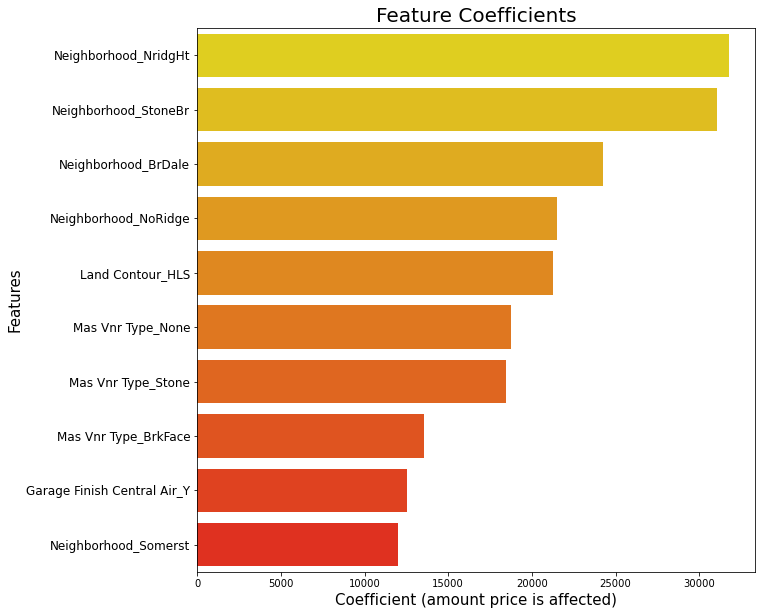

In [104]:
plt.figure(figsize=(10,10))

sns.barplot(data=coef_df_lr2.sort_values(by='coef', ascending=False)[:10],
            y='features',
            x='coef',
            palette='autumn_r',
#             orient='h'
           )

plt.title('Feature Coefficients', Size=20)
plt.ylabel('Features', size=15)
plt.xlabel('Coefficient (amount price is affected)', size=15)
plt.yticks(size=12);

### <div align="center">  ** Interpretation: ** </div>

The features in the above graph are the top 7 that affect prediction prices. We can say that for homes in the Northridge neighborhood, we can expect to see the value increase by the coefficient amount (in dollars), compared to homes in the Bloomington Heights neighborhood, all else equal.

In [105]:
# creating df of neighborhoods and their coefficients
# code from https://kanoki.org/2019/11/12/how-to-use-regex-in-pandas/
import re

neighborhood = coef_df_lr2[coef_df_lr2['features'].str.count(r'^Neighborhood')>0].copy()
neighborhood

,features,coef
39,Neighborhood_BrDale,24231.865625
40,Neighborhood_BrkSide,6999.281003
41,Neighborhood_CollgCr,-109.556608
42,Neighborhood_Edwards,-4309.363249
43,Neighborhood_IDOTRR,2690.993187
44,Neighborhood_NAmes,-1947.592958
45,Neighborhood_NoRidge,21471.917805
46,Neighborhood_NridgHt,31762.501166
47,Neighborhood_OldTown,-1607.657933
48,Neighborhood_Sawyer,2085.529565


In [106]:
# mapping to neighborhood proper names for ease of readibility
map_nbr = {
           'Neighborhood_Blueste': 'Bluestem',
           'Neighborhood_BrDale': 'Briardale',
           'Neighborhood_BrkSide': 'Brookside',
           'Neighborhood_ClearCr': 'Clear Creek',
           'Neighborhood_CollgCr': 'College Creek',
           'Neighborhood_Crawfor': 'Crawford',
           'Neighborhood_Edwards': 'Edwards',
           'Neighborhood_Gilbert': 'Gilbert',
           'Neighborhood_Greens': 'Greens',
           'Neighborhood_GrnHill': 'Green Hills',
           'Neighborhood_IDOTRR': 'Iowa DOT & Rail Road',
           'Neighborhood_Landmrk': 'Landmark',
           'Neighborhood_MeadowV': 'Meadow Village',
           'Neighborhood_Mitchel': 'Mitchell',
           'Neighborhood_NAmes': 'North Ames',
           'Neighborhood_NoRidge': 'Northridge',
           'Neighborhood_NPkVill': 'Northpark Villa',
           'Neighborhood_NridgHt': 'Northridge Heights',
           'Neighborhood_NWAmes': 'Northwest Ames',
           'Neighborhood_OldTown': 'Old Town',
           'Neighborhood_SWISU': 'South & West of ISUni',
           'Neighborhood_Sawyer': 'Sawyer',
           'Neighborhood_SawyerW': 'Sawyer West',
           'Neighborhood_Somerst': 'Somerset',
           'Neighborhood_StoneBr': 'Stone Brook',
           'Neighborhood_Timber': 'Timberland',
           'Neighborhood_Veenker': 'Veenker'}

neighborhood.replace(map_nbr, inplace=True)

<ipython-input-107-581f80c39a5a>:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title('Neighborhood Coefficients', Size=20)


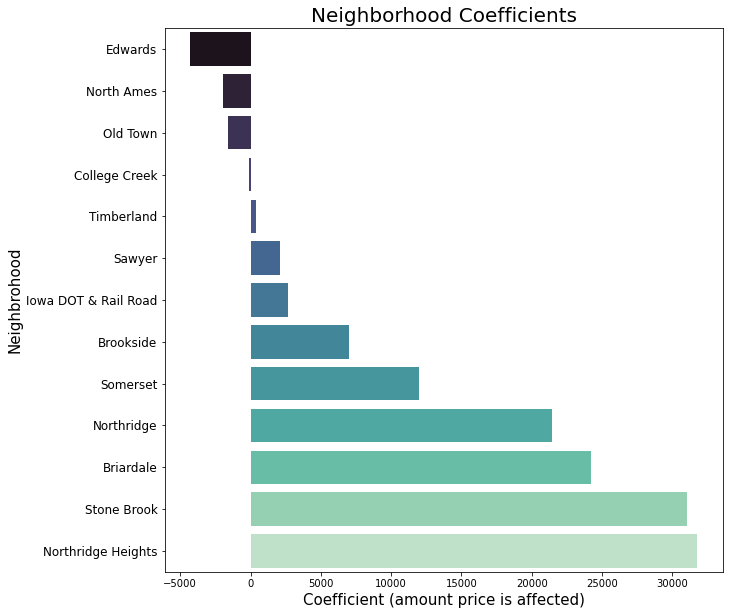

In [107]:

plt.figure(figsize=(10,10))

sns.barplot(data=neighborhood.sort_values(by='coef'),
            y='features',
            x='coef',
            palette='mako',
#             orient='h'
           )

plt.title('Neighborhood Coefficients', Size=20)
plt.ylabel('Neighbrohood', size=15)
plt.xlabel('Coefficient (amount price is affected)', size=15)
plt.yticks(size=12);

### <div align="center">  ** Interpretation: ** </div>

The following neighborhoods decrease the prediction price (compared with Bloomington Heights) when all else is equal:

- Edwards
- Old Town
- North Ames


The following neighborhoods increase the prediction price (compared with Bloomington Heights) when all else is equal:

- Northridge Heights
- Stone Brook
- Briardale
- Northridge
- Somerset

The neighborhoods in the first category should be studied further to understand where they can be helped to raise their property values.

In [108]:
# calculating residuals
y_preds_2 = lr_2.predict(XT_test)
resids_2 = yt_test - y_preds_2
resids_2.sort_values(ascending=False)

Id
1427     71200.605398
2736     64526.760731
1588     60265.191633
1539     60077.399297
1300     46121.006806
            ...      
220     -56659.110483
1956    -63623.499324
1002    -65697.661152
1783   -115136.535044
1183   -152262.167956
Name: SalePrice, Length: 502, dtype: float64

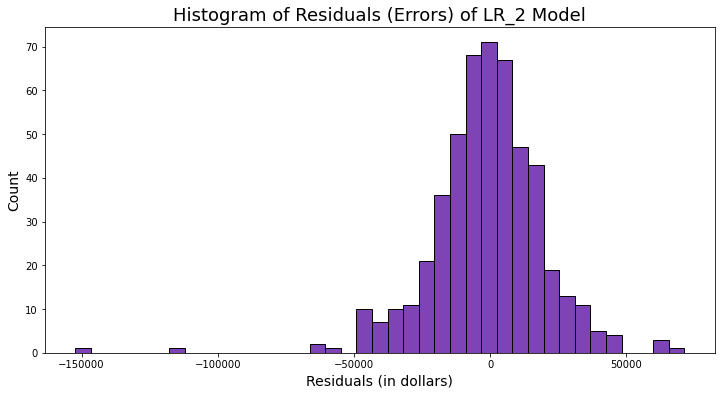

In [109]:
# Histogram of residuals (errors) to see distribution
plt.figure(figsize=(12, 6))

sns.histplot(resids_2, color='#53059C')
plt.title('Histogram of Residuals (Errors) of LR_2 Model', size=18)
plt.xlabel('Residuals (in dollars)', size=14)
plt.ylabel('Count', size=14);

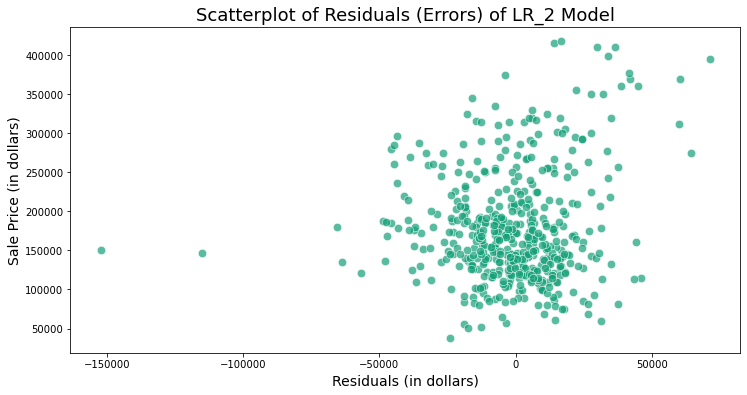

In [110]:
# Scatterplot of residuals (errors) to see stecasticity
plt.figure(figsize=(12, 6))

sns.scatterplot(x = resids_2, y = y_test, color='#13A078', s=70, alpha=0.7)
plt.title('Scatterplot of Residuals (Errors) of LR_2 Model', size=18)
plt.xlabel('Residuals (in dollars)', size=14)
plt.ylabel('Sale Price (in dollars)', size=14);

### <div align="center">  ** Interpretation: ** </div>

* Except for a few outliers, the residuals (errors) have a mostly normal distribution, (but with outliers, it's slightly left-tailed)
* Scatterplot results are heteroscedastic due to our few outliers
* Largest cluster between the 100,000 to 200,000 'Sale Price' and between the -50,000 to 50,000 range in errors.
* Not much change from original LR model, except that we can see a shift in the range of outliers (lower range in this model, which means it is doing better)

## <div align="center"> Scaling and Refitting Data on New Linear Regression Model with Polynomials

In [111]:
# Scaling our data

sc2 = StandardScaler()
ZT_train = sc2.fit_transform(XT_train)
ZT_test = sc2.transform(XT_test)

In [112]:
# Instantiating OLS (Ordinary Least Squares) Linear Regression model on scaled X and y
ols2 = LinearRegression()
ols2.fit(ZT_train, yt_train)

scaled_metrics(ols2, XT, ZT_train, ZT_test, yt_train, yt_test)

================ LinearRegression() ================
Model Training CVS Score: 0.8897538766617978
----------------------------------------------------
Model Training r2 Score: 0.9258790203412701
----------------------------------------------------
Model Testing r2 Score: 0.8777199137317515
----------------------------------------------------
Model Adjusted r2 Score: 0.8048970598076672
================== Baseline RMSE ===================
Baseline RMSE for train set: 74249.77649060152
Baseline RMSE for test set: 69429.22705268335
==================== model RMSE ====================
Train Root Mean Squared Error: 20214.626715902417
Test Root Mean Squared Error: 24275.21804392817
================= Difference between Model and Baseline RMSE =================
Difference between train RMSE and baseline train RMSE: 54035.14977469911
Difference between test RMSE and baseline test RMSE: 45154.00900875518


### <div align="center">  ** Interpretation OLS 2 model: ** </div>

Not a terrible model, but the adjusted $r^2$ score being so much lower than the the original $r^2$ is a point of concern and might mean the model has too much variance and is overfit for this model type.

In [113]:
# adding ols predictions to comparison df
comp['ols_preds_2'] = ols2.predict(ZT_test)
comp['difference6'] = comp['ols_preds_2'] - comp['price']

## <div align="center"> Ridge 2 Regression Modeling

In [114]:
# r_alphas = np.linspace(0, 1000, 500)

# Instantiating ridge

ridge2 = RidgeCV(alphas=[2.004008016032064], scoring='r2', normalize=True, cv=5)

# Fitting ridge model
ridge2.fit(ZT_train, yt_train)

print (scaled_metrics(ridge2, XT, ZT_train, ZT_test, yt_train, yt_test))

# checking best alpha
print (ridge2.alpha_)

 RidgeCV(alphas=array([2.00400802]), cv=5, normalize=True, scoring='r2') 
Model Training CVS Score: 0.8525986231646808
----------------------------------------------------
Model Training r2 Score: 0.8596146220016778
----------------------------------------------------
Model Testing r2 Score: 0.8716081880979085
----------------------------------------------------
Model Adjusted r2 Score: 0.7951455485256438
================== Baseline RMSE ===================
Baseline RMSE for train set: 74249.77649060152
Baseline RMSE for test set: 69429.22705268335
==================== model RMSE ====================
Train Root Mean Squared Error: 27819.9335629393
Test Root Mean Squared Error: 24874.475679562296
================= Difference between Model and Baseline RMSE =================
Difference between train RMSE and baseline train RMSE: 46429.84292766222
Difference between test RMSE and baseline test RMSE: 44554.75137312105
None
2.004008016032064


### <div align="center">  ** Interpretation Ridge 2 Model: ** </div>

Similar to the previous results of the ols_2, except this model is even worse.

In [115]:
# adding ridge predictions to comparison df
comp['ridge_preds_2'] = ridge2.predict(ZT_test)
comp['difference7'] = comp['ridge_preds_2'] - comp['price']

## <div align="center"> Lasso 2 Regression Modeling

In [116]:
# Logspace to find best alpha fit for model
# l_alphas = np.logspace(-2,0,10)

# Instantiating and fitting lasso
lasso2 = LassoCV(alphas = [1.0], cv=5, normalize=True, max_iter=100000).fit(ZT_train, yt_train)

print (scaled_metrics(lasso2, XT, ZT_train, ZT_test, yt_train, yt_test))

print (lasso2.alpha_)

 LassoCV(alphas=[1.0], cv=5, max_iter=100000, normalize=True) 
Model Training CVS Score: 0.901645612083309
----------------------------------------------------
Model Training r2 Score: 0.9230907734814514
----------------------------------------------------
Model Testing r2 Score: 0.8879646863517617
----------------------------------------------------
Model Adjusted r2 Score: 0.8212430186695306
================== Baseline RMSE ===================
Baseline RMSE for train set: 74249.77649060152
Baseline RMSE for test set: 69429.22705268335
==================== model RMSE ====================
Train Root Mean Squared Error: 20591.328755617415
Test Root Mean Squared Error: 23236.07333301165
================= Difference between Model and Baseline RMSE =================
Difference between train RMSE and baseline train RMSE: 53658.4477349841
Difference between test RMSE and baseline test RMSE: 46193.153719671696
None
1.0


### <div align="center">  ** Interpretation Lasso Model: ** </div>

This model is not bad, but again we see a big difference in the adjusted $r^2$ and original which concerns us.

In [117]:
# adding lasso predictions to comparison df
comp['lasso_preds_2'] = lasso2.predict(ZT_test)
comp['difference8'] = comp['lasso_preds_2'] - comp['price']

## <div align="center"> Using Pipelines to Test Different Models at Once
<div align="center"> (StandardScaler, KNeighborsRegressor, RidgeCV)

In [118]:
# code from GA class lesson 4.07
# instantiating pipeline with StandardScaler and KNeighborsRegressor
pipe_1 = Pipeline(steps = [
    ('sc3', StandardScaler()),
    ('knr', KNeighborsRegressor())
    ])

# creating hyperparameters dictionary
pipe_1_params = {
    'sc3__with_mean': [False],
    'sc3__with_std': [True, False],
    'knr__n_neighbors': [7, 11],
    'knr__weights': ['distance']
}

In [119]:
# instantiating and fitting gridearchCV on pipeline
# code from GA class lesson 4.07
pipe_1_gridsearch = GridSearchCV(pipe_1,
                               pipe_1_params,
                               cv=5,
                               verbose=1,
                               return_train_score=True)
pipe_1_gridsearch.fit(XT_train, yt_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    6.3s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sc3', StandardScaler()),
                                       ('knr', KNeighborsRegressor())]),
             param_grid={'knr__n_neighbors': [7, 11],
                         'knr__weights': ['distance'],
                         'sc3__with_mean': [False],
                         'sc3__with_std': [True, False]},
             return_train_score=True, verbose=1)

In [120]:
# printing best model and score from pipeline w/gridsearchCV
print (pipe_1_gridsearch.best_estimator_)
print (pipe_1_gridsearch.best_score_)

Pipeline(steps=[('sc3', StandardScaler(with_mean=False)),
                ('knr',
                 KNeighborsRegressor(n_neighbors=7, weights='distance'))])
0.756152729285161


In [121]:
# Pipeline(steps=[('sc3', StandardScaler()),
#                 ('knr',
#                  KNeighborsRegressor(n_neighbors=7, weights='distance'))])

# creating baseline for train and test data
scaled_metrics(pipe_1_gridsearch, XT, XT_train, XT_test, yt_train, yt_test)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    4.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    4.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    4.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    4.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    4.4s finished


 GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sc3', StandardScaler()),
                                       ('knr', KNeighborsRegressor())]),
             param_grid={'knr__n_neighbors': [7, 11],
                         'knr__weights': ['distance'],
                         'sc3__with_mean': [False],
                         'sc3__with_std': [True, False]},
             return_train_score=True, verbose=1) 
Model Training CVS Score: 0.756152729285161
----------------------------------------------------
Model Training r2 Score: 0.999996602986157
----------------------------------------------------
Model Testing r2 Score: 0.7527318447558297
----------------------------------------------------
Model Adjusted r2 Score: 0.6054734210913078
================== Baseline RMSE ===================
Baseline RMSE for train set: 74249.77649060152
Baseline RMSE for test set: 69429.22705268335
==================== model RMSE ====================
Train Root Mean Squared Error: 136.84968

### <div align="center">  ** Interpretation Pipeline 1 with StandardScaler and KNeighborsRegressor Model: ** </div>

This is a terrible model as we can see by the huge difference in training and testing metrics.

In [122]:
# adding gridsearch 1 preds to comparison df

comp['pipe_preds_1_knr'] = pipe_1_gridsearch.predict(ZT_test)
comp['difference9'] = comp['pipe_preds_1_knr'] - comp['price']

In [123]:
# instantiating pipeline with StandardScaler and RidgeCV
pipe_2 = Pipeline(steps = [
    ('sc4', StandardScaler()),
    ('ridge3', RidgeCV())
    ])

# creating hyperparameters dictionary
RidgeCV().get_params()

{'alphas': array([ 0.1,  1. , 10. ]),
 'cv': None,
 'fit_intercept': True,
 'gcv_mode': None,
 'normalize': False,
 'scoring': None,
 'store_cv_values': False}

In [124]:
# creating params dictionary for pipe 2

pipe_2_params = {
    'sc4__with_mean': [False],
    'sc4__with_std': [True, False],
    'ridge3__normalize': [True],
    'ridge3__cv': [3, 4, 5]
}

In [125]:
# instantiating and fitting gridearchCV on pipeline

pipe_2_gridsearch = GridSearchCV(pipe_2,
                               pipe_2_params,
                               verbose=1,
                               return_train_score=True)
pipe_2_gridsearch.fit(XT_train, yt_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.8s finished


GridSearchCV(estimator=Pipeline(steps=[('sc4', StandardScaler()),
                                       ('ridge3',
                                        RidgeCV(alphas=array([ 0.1,  1. , 10. ])))]),
             param_grid={'ridge3__cv': [3, 4, 5], 'ridge3__normalize': [True],
                         'sc4__with_mean': [False],
                         'sc4__with_std': [True, False]},
             return_train_score=True, verbose=1)

In [126]:
# printing best model and score from pipeline w/gridsearchCV

print (pipe_2_gridsearch.best_estimator_)
print (pipe_2_gridsearch.best_score_)

Pipeline(steps=[('sc4', StandardScaler(with_mean=False)),
                ('ridge3',
                 RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=3,
                         normalize=True))])
0.9037312125722702


In [127]:
# Pipeline(steps=[('sc4', StandardScaler()),
#                 ('ridge3',
#                  RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=6,
#                          normalize=True))])

# creating baseline for train and test data
scaled_metrics(pipe_2_gridsearch, XT, XT_train, XT_test, yt_train, yt_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 6 candidates, totalling 30 fits
 GridSearchCV(estimator=Pipeline(steps=[('sc4', StandardScaler()),
                                       ('ridge3',
                                        RidgeCV(alphas=array([ 0.1,  1. , 10. ])))]),
             param_grid={'ridge3__cv': [3, 4, 5], 'ridge3__normalize': [True],
                         'sc4__with_mean': [False],
                         'sc4__with_std': [True, False]},
             return_train_score=True, verbose=1) 
Model Training CVS Score: 0.9037312125722702
----------------------------------------------------
Model Training r2 Score: 0.9186566357936428
----------------------------------------------------
Model Testing r2 Score: 0.8929319185596305
----------------------------------------------------
Model Adjusted r2 Score: 0.8291684433069264
================== Baseline RMSE ===================
Baseline RMSE for train set: 74249.77649060152
Baseline RMSE for test set: 69429.22705268335
=================

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.8s finished


In [128]:
# adding gridsearch 2 preds to comparison df

comp['pipe_preds_2_ridge'] = pipe_2_gridsearch.predict(ZT_test)
comp['difference10'] = comp['pipe_preds_2_ridge'] - comp['price']

### <div align="center">  ** Interpretation Pipeline 2 with StandardScaler and RidgeCV Model: ** </div>

Again, there is a big difference in the adjusted $r^2$ and the original, so we will not be using this model.

## <div align="center"> ** Comparison of Models **

In [129]:
# Comparisons between actual and predictions in a df

comp.describe()

,price,lr_preds,difference,ols_preds,difference2,ridge_preds,difference3,lasso_preds,difference4,lr2_preds,...,ols_preds_2,difference6,ridge_preds_2,difference7,lasso_preds_2,difference8,pipe_preds_1_knr,difference9,pipe_preds_2_ridge,difference10
count,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,...,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,5.020000e+02
mean,177483.270916,179765.119306,2281.848390,179763.856449,2280.585533,179645.863951,2162.593034,179821.098912,2337.827996,178864.604822,...,179755.648986,2272.378070,179626.435420,2143.164503,179930.907546,2447.636630,88603.572825,-88879.698091,-694283.281513,-8.717666e+05
std,69489.352814,71308.634822,23092.965446,71311.752973,23086.442620,58955.583138,24360.951217,71172.696552,22776.364221,69937.868160,...,71778.369292,24192.734905,58698.799492,24806.697227,71404.557843,23129.848590,11194.791943,67763.776505,91641.623376,6.456935e+04
min,37900.000000,22303.283276,-79055.586153,22338.405965,-78921.456522,55069.074326,-99596.784084,21178.912150,-75616.825287,28492.716473,...,29344.496317,-77288.384802,54820.221521,-99419.949796,30993.325769,-83376.638690,56219.663109,-325089.789072,-855460.979366,-1.050390e+06
25%,130625.000000,127372.360947,-10278.554806,127345.569424,-10314.610657,133822.950680,-7767.726084,127438.835301,-9812.913265,127461.738782,...,125029.898287,-12036.377307,135007.912852,-7022.439156,125459.944532,-11172.269549,84408.922274,-120838.293020,-751190.819956,-9.055041e+05
50%,164950.000000,170646.009588,511.158325,170612.590296,501.235439,173256.956735,4222.547472,170486.467099,422.457891,168959.240063,...,169663.159521,800.394752,175425.023665,4032.149356,170735.361538,1066.937093,84419.542188,-74017.075881,-719517.398417,-8.796115e+05
75%,206975.000000,220007.951348,13082.086059,220031.161866,13083.375456,214661.170041,15335.655609,220038.228906,13149.286200,216666.930629,...,219306.363236,15704.830995,214480.363239,14992.329876,219761.727056,13866.858245,92405.990429,-41888.507297,-670582.985066,-8.526420e+05
max,417500.000000,410324.724673,189182.341415,410366.672425,189183.731468,347467.504005,135468.591495,408416.282218,187835.021454,400823.334590,...,405329.409738,162618.422518,345841.913596,130622.919367,405543.184971,168364.797357,158641.092456,42422.223387,-224398.560629,-4.934848e+05


In [130]:
def train_preds(model, X, Xtrain, Xtest, ytrain, ytest):
    # creating predictions
    train_preds = model.predict(Xtrain)
    
def test_preds(model, X, Xtrain, Xtest, ytrain, ytest):
    # creating predictions
    test_preds = model.predict(Xtest)
    
def cvs(model, X, Xtrain, Xtest, ytrain, ytest):    
    # cross value score of scaled data in ols model
    train_cvs = cross_val_score(model, Xtrain, ytrain)
    return train_csv
    
def train_r2(model, X, Xtrain, Xtest, ytrain, ytest):
    # r2 Scores of OLS model on training and testing data
    train_r2 = model.score(Xtrain, ytrain)
    return train_r2

def test_r2(model, X, Xtrain, Xtest, ytrain, ytest):
    # r2 Scores of OLS model on training and testing data
    test_r2 = model.score(Xtest, ytest)
    return test_r2

def adj_test_r2(model, X, Xtrain, Xtest, ytrain, ytest):
    # r2 Scores of OLS model on training and testing data
    test_r2 = model.score(Xtest, ytest)
    return r2_adj(X, ytest, test_r2)
    
def train_baseline_rmse(model, X, Xtrain, Xtest, ytrain, ytest):
    # creating baseline for train and test data
    train_baseline = [ytrain.mean()]*len(ytrain)
    train_baseline_rmse = mean_squared_error(ytrain, train_baseline)**0.5
    return train_baseline_rmse

def train_baseline_rmse(model, X, Xtrain, Xtest, ytrain, ytest):
    # creating baseline for train and test data

    test_baseline = [ytrain.mean()]*len(ytest)
    test_baseline_rmse = mean_squared_error(ytest, test_baseline)**0.5
    return test_baseline_rmse

def train_rmse(model, X, Xtrain, Xtest, ytrain, ytest):
    # Root Mean Squared Error of OLS predictions
    
    train_preds = model.predict(Xtrain)
    train_rmse = mean_squared_error(y_train, train_preds)**0.5
    return train_rmse
    
def test_rmse(model, X, Xtrain, Xtest, ytrain, ytest):
    # Root Mean Squared Error of OLS predictions

    test_preds = model.predict(Xtest)
    test_rmse = mean_squared_error(y_test, test_preds)**0.5
    return test_rmse

def train_diff_rmse(model, X, Xtrain, Xtest, ytrain, ytest):
    # Difference between RMSE and baseline RMSE
    
    return (train_baseline_rmse) - (train_rmse)
    
def test_diff_rmse(model, X, Xtrain, Xtest, ytrain, ytest):
    # Difference between RMSE and baseline RMSE
    
    return (test_baseline_rmse) - (test_rmse)

In [131]:
models = ['lr', 'ols', 'ridge', 'lasso', 'lr_2', 
          'ols2', 'ridge2', 'lasso2', 'pipe_1_gridsearch', 'pipe_2_gridsearch']

In [132]:
review = pd.DataFrame()
review['Model'] = ['Linear Regression lr', 'OLS 1', 'Ridge 1', 'Lasso 1',
                   'Linear Regression lr_2 poly', 'OLS 2', 'Ridge 2', 'Lasso 2',
                   'Pipe 1 KNr', 'Pipe 2 Ridge']
review['Train r2'] = [lr.score(X_train, y_train), ols.score(Z_train, y_train),
                      ridge.score(Z_train, y_train), lasso.score(Z_train, y_train),
                      lr_2.score(XT_train, yt_train), ols2.score(ZT_train, yt_train),
                      ridge2.score(ZT_train, yt_train), lasso2.score(ZT_train, yt_train),
                      pipe_1_gridsearch.best_score_, pipe_2_gridsearch.best_score_]
review['Test r2'] = [lr.score(X_test, y_test), ols.score(Z_test, y_test),
                      ridge.score(Z_test, y_test), lasso.score(Z_test, y_test),
                      lr_2.score(XT_test, yt_test), ols2.score(ZT_test, yt_test),
                      ridge2.score(ZT_test, yt_test), lasso2.score(ZT_test, yt_test),
                      pipe_1_gridsearch.best_score_, pipe_2_gridsearch.best_score_]
review['Train RMSE'] = [train_rmse(lr, X, X_train, X_test, y_train, y_test), 
                        train_rmse(ols, X, Z_train, Z_test, y_train, y_test),
                        train_rmse(ridge, X, Z_train, Z_test, y_train, y_test),
                        train_rmse(lasso, X, Z_train, Z_test, y_train, y_test),
                        train_rmse(lr_2, XT, XT_train, XT_test, yt_train, yt_test),
                        train_rmse(ols2, XT, ZT_train, ZT_test, yt_train, yt_test),
                        train_rmse(ridge2, XT, ZT_train, ZT_test, yt_train, yt_test),
                        train_rmse(lasso2, XT, ZT_train, ZT_test, yt_train, yt_test),
                        train_rmse(pipe_1_gridsearch, XT, XT_train, XT_test, yt_train, yt_test),
                        train_rmse(pipe_2_gridsearch, XT, XT_train, XT_test, yt_train, yt_test)]
review['Test RMSE'] = [test_rmse(lr, X, X_train, X_test, y_train, y_test), 
                        test_rmse(ols, X, Z_train, Z_test, y_train, y_test),
                        test_rmse(ridge, X, Z_train, Z_test, y_train, y_test),
                        test_rmse(lasso, X, Z_train, Z_test, y_train, y_test),
                        test_rmse(lr_2, XT, XT_train, XT_test, yt_train, yt_test),
                        test_rmse(ols2, XT, ZT_train, ZT_test, yt_train, yt_test),
                        test_rmse(ridge2, XT, ZT_train, ZT_test, yt_train, yt_test),
                        test_rmse(lasso2, XT, ZT_train, ZT_test, yt_train, yt_test),
                        test_rmse(pipe_1_gridsearch, XT, XT_train, XT_test, yt_train, yt_test),
                        test_rmse(pipe_2_gridsearch, XT, XT_train, XT_test, yt_train, yt_test)]

In [133]:
pd.review.sort_values(by='Test RMSE')

,Model,Train r2,Test r2,Train RMSE,Test RMSE
4,Linear Regression lr_2 poly,0.922634,0.909479,20652.405322,20886.176699
9,Pipe 2 Ridge,0.903731,0.903731,21176.599136,22715.132873
3,Lasso 1,0.933637,0.891434,19127.492934,22873.452186
1,OLS 1,0.934058,0.888544,19066.685849,23175.918158
0,Linear Regression lr,0.934059,0.888480,19066.560181,23182.527134
7,Lasso 2,0.923091,0.887965,20591.328756,23236.073333
5,OLS 2,0.925879,0.877720,20214.626716,24275.218044
2,Ridge 1,0.871199,0.876130,26647.345716,24432.571901
6,Ridge 2,0.859615,0.871608,27819.933563,24874.475680
8,Pipe 1 KNr,0.756153,0.756153,136.849687,34519.887022


<ipython-input-134-bbc762769f72>:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title('Models by Testing R^2 Score', Size=20)


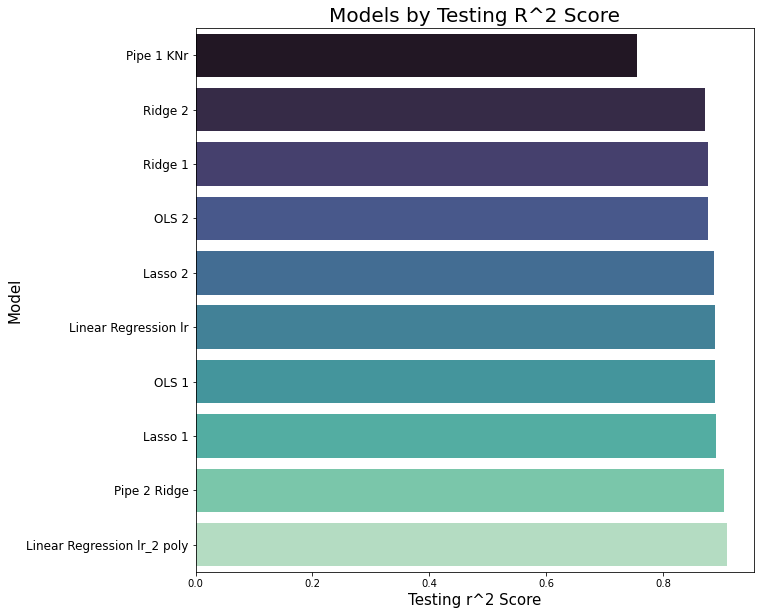

In [134]:
plt.figure(figsize=(10,10))

sns.barplot(data=review.sort_values(by='Test r2'),
            y='Model',
            x='Test r2',
            palette='mako',
            orient='h')

plt.title('Models by Testing R^2 Score', Size=20)
plt.ylabel('Model', size=15)
plt.xlabel('Testing r^2 Score', size=15)
plt.yticks(size=12);

<ipython-input-135-47a835e15136>:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title('Models by Testing RMSE Score', Size=20)


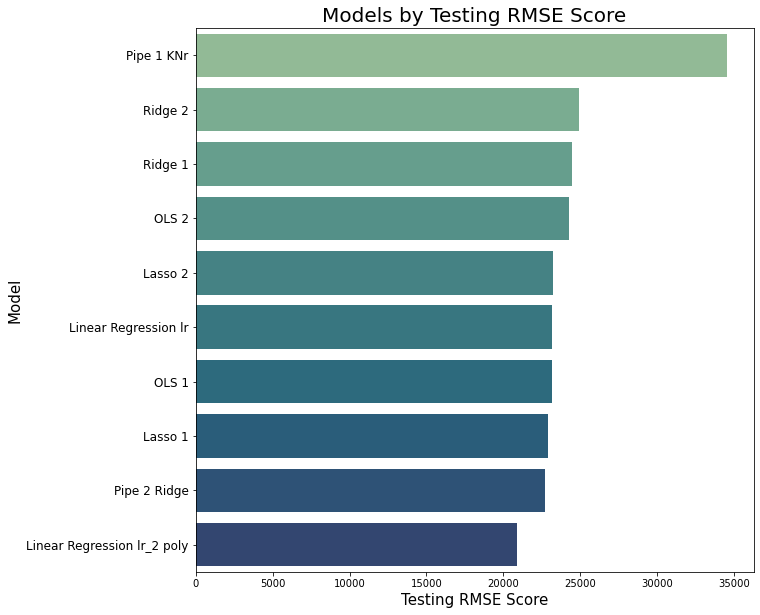

In [135]:
plt.figure(figsize=(10,10))

sns.barplot(data=review.sort_values(by='Test RMSE', ascending=False),
            y='Model',
            x='Test RMSE',
            palette='crest',
            orient='h')

plt.title('Models by Testing RMSE Score', Size=20)
plt.ylabel('Model', size=15)
plt.xlabel('Testing RMSE Score', size=15)
plt.yticks(size=12);

In [187]:
# coefficients without neighborhoods
new_coefs = pd.concat([coef_df_lr2[:39],coef_df_lr2[52:]])
new_coefs.shape

(174, 2)

<ipython-input-188-a203e113fa21>:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title('Feature Coefficients', Size=20)


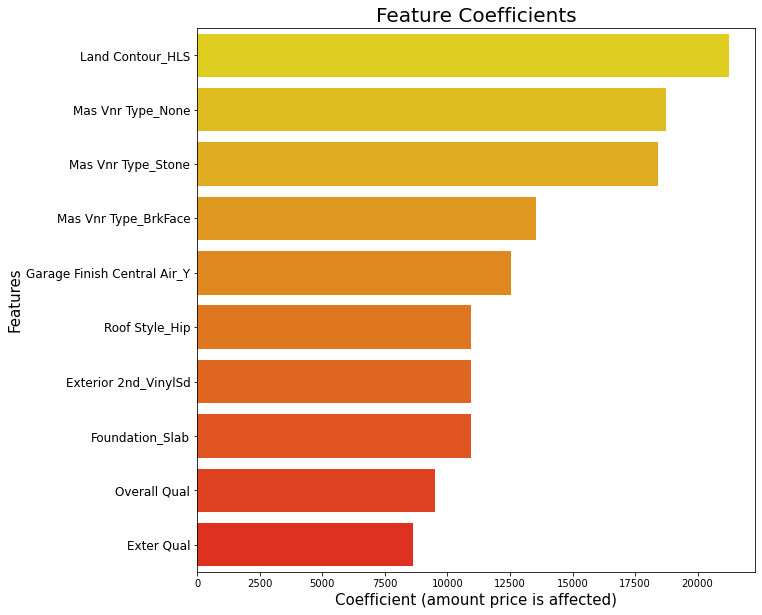

In [188]:
# top 10 coefficicients without neighborhoods
plt.figure(figsize=(10,10))

sns.barplot(data=new_coefs.sort_values(by='coef', ascending=False)[:10],
            y='features',
            x='coef',
            palette='autumn_r',
#             orient='h'
           )

plt.title('Feature Coefficients', Size=20)
plt.ylabel('Features', size=15)
plt.xlabel('Coefficient (amount price is affected)', size=15)
plt.yticks(size=12);

In [136]:
XT.columns

Index(['Lot Frontage', 'Lot Area', 'Lot Shape', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'Exter Qual',
       'Bsmt Qual',
       ...
       'Garage Finish Garage Cond', 'Garage Finish Paved Drive',
       'Garage Finish Central Air_Y', 'Garage Cars Garage Cond',
       'Garage Area Garage Qual', 'Garage Area Garage Cond',
       'Garage Area Central Air_Y', 'Garage Qual Central Air_Y',
       'Garage Cond Central Air_Y', 'Mas Vnr Type_None Central Air_Y'],
      dtype='object', length=187)

##### <div align="center"> ** Interpretation: ** </div>
### Looking at the mean difference in the models versus the prices in the y_test 'SalePrice', the model with the lowest mean difference:

### * Linear Regression with 225 polynomial features

## <div align="center"> ** Interpretation of Final Model **

In [137]:
reg_metrics(lr_2, XT, y, XT_train, XT_test, yt_train, yt_test)

('Cross Value Score Mean: 0.895539960152276',
 'OLS Training Score: 0.9258790203412701',
 'OLS Testing Score: 0.9258790203412701',
 'Baseline Mean Squared Error Training Data: 5513029308.904282',
 'Baseline Mean Squared Error Testing Data: 4820417569.133058',
 'Mean Squared Error Training Data: 426521845.568554',
 'Mean Squared Error Testing Data: 436232377.0853772',
 'Difference in Training Model and Baseline MSE: 5086507463.335728',
 'Difference in Testing Model and Baseline MSE: 4384185192.04768',
 'Baseline Root Mean Squared Error Training Data: 74249.77649060152',
 'Baseline Root Mean Squared Error Testing Data: 69429.22705268335',
 'Root Mean Squared Error Training Data: 20652.405321621838',
 'Root Mean Squared Error Testing Data: 20886.17669860564',
 'Difference in Training Model and Baseline RMSE: 53597.371168979684',
 'Difference in Testing Model and Baseline RMSE: 48543.050354077706',
 'R2 Score: 0.922633851251314',
 'R2 Adjusted Score: 0.9246891607823068')

### <div align="center">  ** Interpretation of Final Model & Conclusion: ** </div>


##### <div align="center">  After running our models, we ran a comparison to see which was the best:


 Model | Train $r^2$ | Test $r^2$ | Train RMSE | Test RMSE
 ----- | ----------- | ---------- | ---------- | --------- 
Linear Regression lr_2 poly|0.922634|0.909479|20652.405322|20886.176699
Pipe 2|Ridge|0.903731|0.903731|21176.599136|22715.132873
Lasso 1|0.933637|0.891434|19127.492934|22873.452186
OLS 1|0.934058|0.888544|19066.685849|23175.918158
Linear Regression lr|0.934059|0.888480|20652.405322|20886.176698
Lasso 2|0.923091|0.887965|20591.328756|23236.073333
OLS 2|0.925879|0.877720|20214.626716|24275.218044
Ridge 1|0.871199|0.876130|26647.345716|24432.571901
Ridge 2|0.859615|0.871608|27819.933563|24874.475680
Pipe 1 KNr|0.756153|0.756153|136.849687|34519.887022


Our second iteration of the linear regression model (Linear Regression lr_2 poly) using 187 features including polynomials performed the best out of all the models we tested. We cleaned, and iterated and refined our model and are happy to say that we are confident our model performs well and will perform about the same on new data as it did on our training model data.


The adjusted  $r^2$  score of the model is roughly $0.92$  which means that about  $92\%$  of the variability in the predictions of the target are explained by the features in the linear regression model with polynomial features.


Our CVS score mean is about  $89.5\%$  which is pretty close to our  $𝑟^2$  scores, and our RMSE values are closer together than in all the other models we tested.

While our model is not perfect, it is pretty good at predicting home prices in Ames, Iowa. If we wanted to make the model even better, we could continue to iterate and refine the models by trying different methods of cleaning certain columns, possibly removing more outliers, and trying different combinations of features. If there is any additional data that could possibly help predict home prices that is not within our datasets, we could also pull that in and clean and join it to our existing dataset.

#### This model is better than all the other models we tried in this project because of the following when compared with the metrics of the other models:

* Higher $r^2$ and adjusted $r^2$
* Smaller difference between training and testing metrics
* Higher CVS score

### Conclusions and recommendations:

- We should use the Linear Regression model with 187 features, including polynomial features to predict housing prices in Ames, Iowa.


- The found that the following neighborhoods decrease the prediction price (compared with Bloomington Heights) when all else is equal:

 - Edwards
 - Old Town
 - North Ames


- The following neighborhoods increase the prediction price (compared with Bloomington Heights) when all else is equal:

 - Northridge Heights
 - Stone Brook
 - Briardale
 - Northridge
 - Somerset


- The neighborhoods in the first category should be studied further to understand where they can be helped to raise their property values.
- The data from the coefficients of the features that we used in the final model should be used to make recommendations to those homeowners.
- Offer incentives to the homeowners in form of tax write-offs or discounts for upgrades to homes.


## <div align="center"> Predictions for Submission to Kaggle

In [138]:
# using original lr model to test
X_testing = test_features_poly_X.loc[:,features_2].rename_axis('Id')
X_testing.columns

Index(['Lot Frontage', 'Lot Area', 'Lot Shape', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'Exter Qual',
       'Bsmt Qual',
       ...
       'Garage Finish Garage Cond', 'Garage Finish Paved Drive',
       'Garage Finish Central Air_Y', 'Garage Cars Garage Cond',
       'Garage Area Garage Qual', 'Garage Area Garage Cond',
       'Garage Area Central Air_Y', 'Garage Qual Central Air_Y',
       'Garage Cond Central Air_Y', 'Mas Vnr Type_None Central Air_Y'],
      dtype='object', length=187)

In [139]:
# creating prediction column
X_testing['SalePrice'] = lr_2.predict(X_testing)
X_testing.head()

,Lot Frontage,Lot Area,Lot Shape,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Bsmt Qual,...,Garage Finish Paved Drive,Garage Finish Central Air_Y,Garage Cars Garage Cond,Garage Area Garage Qual,Garage Area Garage Cond,Garage Area Central Air_Y,Garage Qual Central Air_Y,Garage Cond Central Air_Y,Mas Vnr Type_None Central Air_Y,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
2658,69.000000,9142,3,6,8,1910,1950,0.0,3,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151335.321685
2718,69.545961,9662,2,5,4,1977,1977,0.0,3,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,170724.534340
2414,58.000000,17104,2,7,5,2006,2006,0.0,4,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206662.327511
1989,60.000000,8520,3,5,6,1923,2006,0.0,4,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108382.615888
625,69.545961,9500,2,6,5,1963,1963,247.0,3,4.0,...,2.0,1.0,6.0,1890.0,1890.0,630.0,3.0,3.0,0.0,182865.495998


In [140]:
# output df for kaggle competition
test_1 = X_testing[['SalePrice']]

test_1

,SalePrice
Id,
2658,151335.321685
2718,170724.534340
2414,206662.327511
1989,108382.615888
625,182865.495998
...,...
1662,180597.814911
1234,224128.184259
1373,126349.717009


In [141]:
# save as csv in datasets folder 
# output16.to_csv('./datasets/sixteenth_submission.csv')

In [142]:
# rechecking output
#  = pd.read_csv('./datasets/first_submission.csv')
# first

In [143]:
# using poly lr model to test
X_kaggle_2 = test_features_poly.loc[:,features_2].rename_axis('Id')
X_kaggle_2.head()
X_kaggle_2.columns

Index(['Lot Frontage', 'Lot Area', 'Lot Shape', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'Exter Qual',
       'Bsmt Qual',
       ...
       'Garage Finish Garage Cond', 'Garage Finish Paved Drive',
       'Garage Finish Central Air_Y', 'Garage Cars Garage Cond',
       'Garage Area Garage Qual', 'Garage Area Garage Cond',
       'Garage Area Central Air_Y', 'Garage Qual Central Air_Y',
       'Garage Cond Central Air_Y', 'Mas Vnr Type_None Central Air_Y'],
      dtype='object', length=187)

In [144]:
print(X_train.shape)
print(X_kaggle_2.shape)

(1504, 143)
(878, 187)


In [145]:
# Scaling our data
# only for certain models

# sc = StandardScaler()
# Z_train = sc.fit(X_train)
# Z_test = sc.transform(X_kaggle_2)

In [146]:
# creating prediction column
# X_kaggle_2['SalePrice'] = lr_2.predict(X_kaggle)
# X_kaggle_2.head()

In [147]:
# output for kaggle
# output17 = X_kaggle_2[['SalePrice']]

# output17

In [148]:
# save as csv in datasets folder 
# output17.to_csv('./datasets/seventeenth_submission.csv')

In [149]:
# second = pd.read_csv('./datasets/second_submission.csv')
# second